In [1]:
!pip install tslearn

     |████████████████████████████████| 778kB 6.1MB/s 


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
%matplotlib inline
plt.style.use('seaborn')
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
BASE_DIR = '/content/drive/My Drive/4th Year/CS 197 (Thesis)/FINAL - COVID Modeling/notebooks/data/'
file_path = os.path.join(BASE_DIR, 'confirmed_added_features.csv')
df = pd.read_csv(file_path, index_col=0)

In [5]:
df.head()

Province/State Country/Region       Lat  ...  shift 20  shift 21 shift 22
0    no province    Afghanistan  33.93911  ...        -1        -1       -1
1    no province        Albania  41.15330  ...        -1        -1       -1
2    no province        Algeria  28.03390  ...        -1        -1       -1
3    no province        Andorra  42.50630  ...         5         2       -1
4    no province         Angola -11.20270  ...        -1        -1       -1

[5 rows x 292 columns]

# K-Means using tslearn

Source: https://towardsdatascience.com/how-to-apply-k-means-clustering-to-time-series-data-28d04a8f7da3

## Confirmed

In [6]:
data = df.iloc[:, 270:]
data.head()

shift 1  shift 2  shift 3  shift 4  ...  shift 19  shift 20  shift 21  shift 22
0        0        0        0        0  ...        -1        -1        -1        -1
1        0        0        0        0  ...        -1        -1        -1        -1
2        0        0        0        0  ...        -1        -1        -1        -1
3        0        0        1        4  ...         6         5         2        -1
4        0        0        0        0  ...        -1        -1        -1        -1

[5 rows x 22 columns]

In [7]:
from tslearn.clustering import TimeSeriesKMeans

class TimeSeriesModel:
  n_clusters = 0
  data = []
  model = None

  def __init__(self, n_clusters, data):
    self.n_clusters = n_clusters
    self.data = data
  
  def build_model(self, metric='dtw', max_iter=10):
    model = TimeSeriesKMeans(n_clusters=self.n_clusters, metric=metric, max_iter=max_iter)
    model.fit(self.data)
    self.model = model

    return model

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


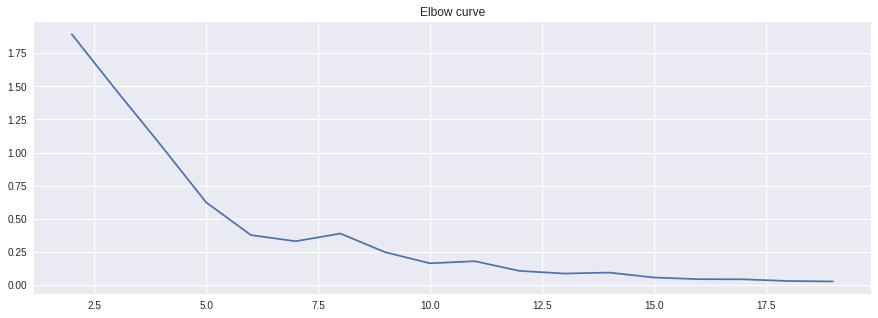

In [8]:
# Elbow method
def get_elbow(data):
  X = data
  distortions = []
  for k in range(2, 20):
    model_class = TimeSeriesModel(n_clusters=k, data=X)
    model = model_class.build_model()
    distortions.append(model.inertia_)

  fig = plt.figure(figsize=(15, 5))
  fig.add_axes()
  plt.plot(range(2, 20), distortions)
  plt.grid(True)
  plt.title('Elbow curve')

get_elbow(data)

In [9]:
# Number of clusters is based on the elbow method
NUM_CLUSTERS = 6

model_class = TimeSeriesModel(n_clusters=NUM_CLUSTERS, data=data)
model = model_class.build_model()

In [10]:
df['labels'] = model.labels_
df.head()

Province/State Country/Region       Lat  ...  shift 21  shift 22 labels
0    no province    Afghanistan  33.93911  ...        -1        -1      1
1    no province        Albania  41.15330  ...        -1        -1      1
2    no province        Algeria  28.03390  ...        -1        -1      1
3    no province        Andorra  42.50630  ...         2        -1      5
4    no province         Angola -11.20270  ...        -1        -1      1

[5 rows x 293 columns]

In [11]:
cluster1 = df[df['labels']==1]
countries = set(cluster1['Country/Region'])
ss = ','.join(countries)
ss

"Congo (Brazzaville),Vietnam,Ghana,Nigeria,Jamaica,Togo,Japan,Brunei,Turkey,Zambia,Saint Lucia,Estonia,Namibia,Germany,Saint Kitts and Nevis,Somalia,Grenada,Yemen,Burundi,Mexico,Saint Vincent and the Grenadines,Taiwan*,Korea, South,Mongolia,Angola,Ethiopia,Guatemala,Chad,Nicaragua,Tanzania,Trinidad and Tobago,Bhutan,Rwanda,Gambia,Iran,Cuba,Uzbekistan,Cambodia,Kenya,Mauritania,China,Cote d'Ivoire,Sri Lanka,Gabon,Tajikistan,Comoros,Botswana,Cyprus,Sierra Leone,Laos,El Salvador,Algeria,Bulgaria,Senegal,Belarus,Russia,Papua New Guinea,Congo (Kinshasa),Seychelles,Burkina Faso,Haiti,New Zealand,India,Guinea-Bissau,Thailand,Pakistan,Barbados,Azerbaijan,Fiji,Australia,Honduras,Guinea,Denmark,Western Sahara,Mali,France,Mozambique,Egypt,Timor-Leste,Malawi,Italy,Liberia,Latvia,Philippines,Central African Republic,Malaysia,Cameroon,Albania,United Kingdom,Finland,Syria,Burma,Afghanistan,Eswatini,Sudan,Bangladesh,Indonesia,Norway,Sao Tome and Principe,Venezuela,Dominica,Eritrea,Lesotho,Greece,Morocc

## Graphing the Clusters

In [12]:
# All countries
def get_graphs(df, cluster_num=0, last_columns=24):
  fig=plt.figure(figsize=(50,20))
  ax=fig.add_axes([0,0,1,1])
  ax.set_xlabel("Dates")
  ax.set_ylabel("Cases")

  df_cluster = df[df['labels'] == cluster_num]
  for idx, area in df_cluster.iterrows():
    x = area.index[6:-last_columns]
    y = [area[i] for i in x]
    
    ax.plot(x,y,label=area['Country/Region'])
    #comment out the line below to remove the labels of the area names.
    ax.legend()

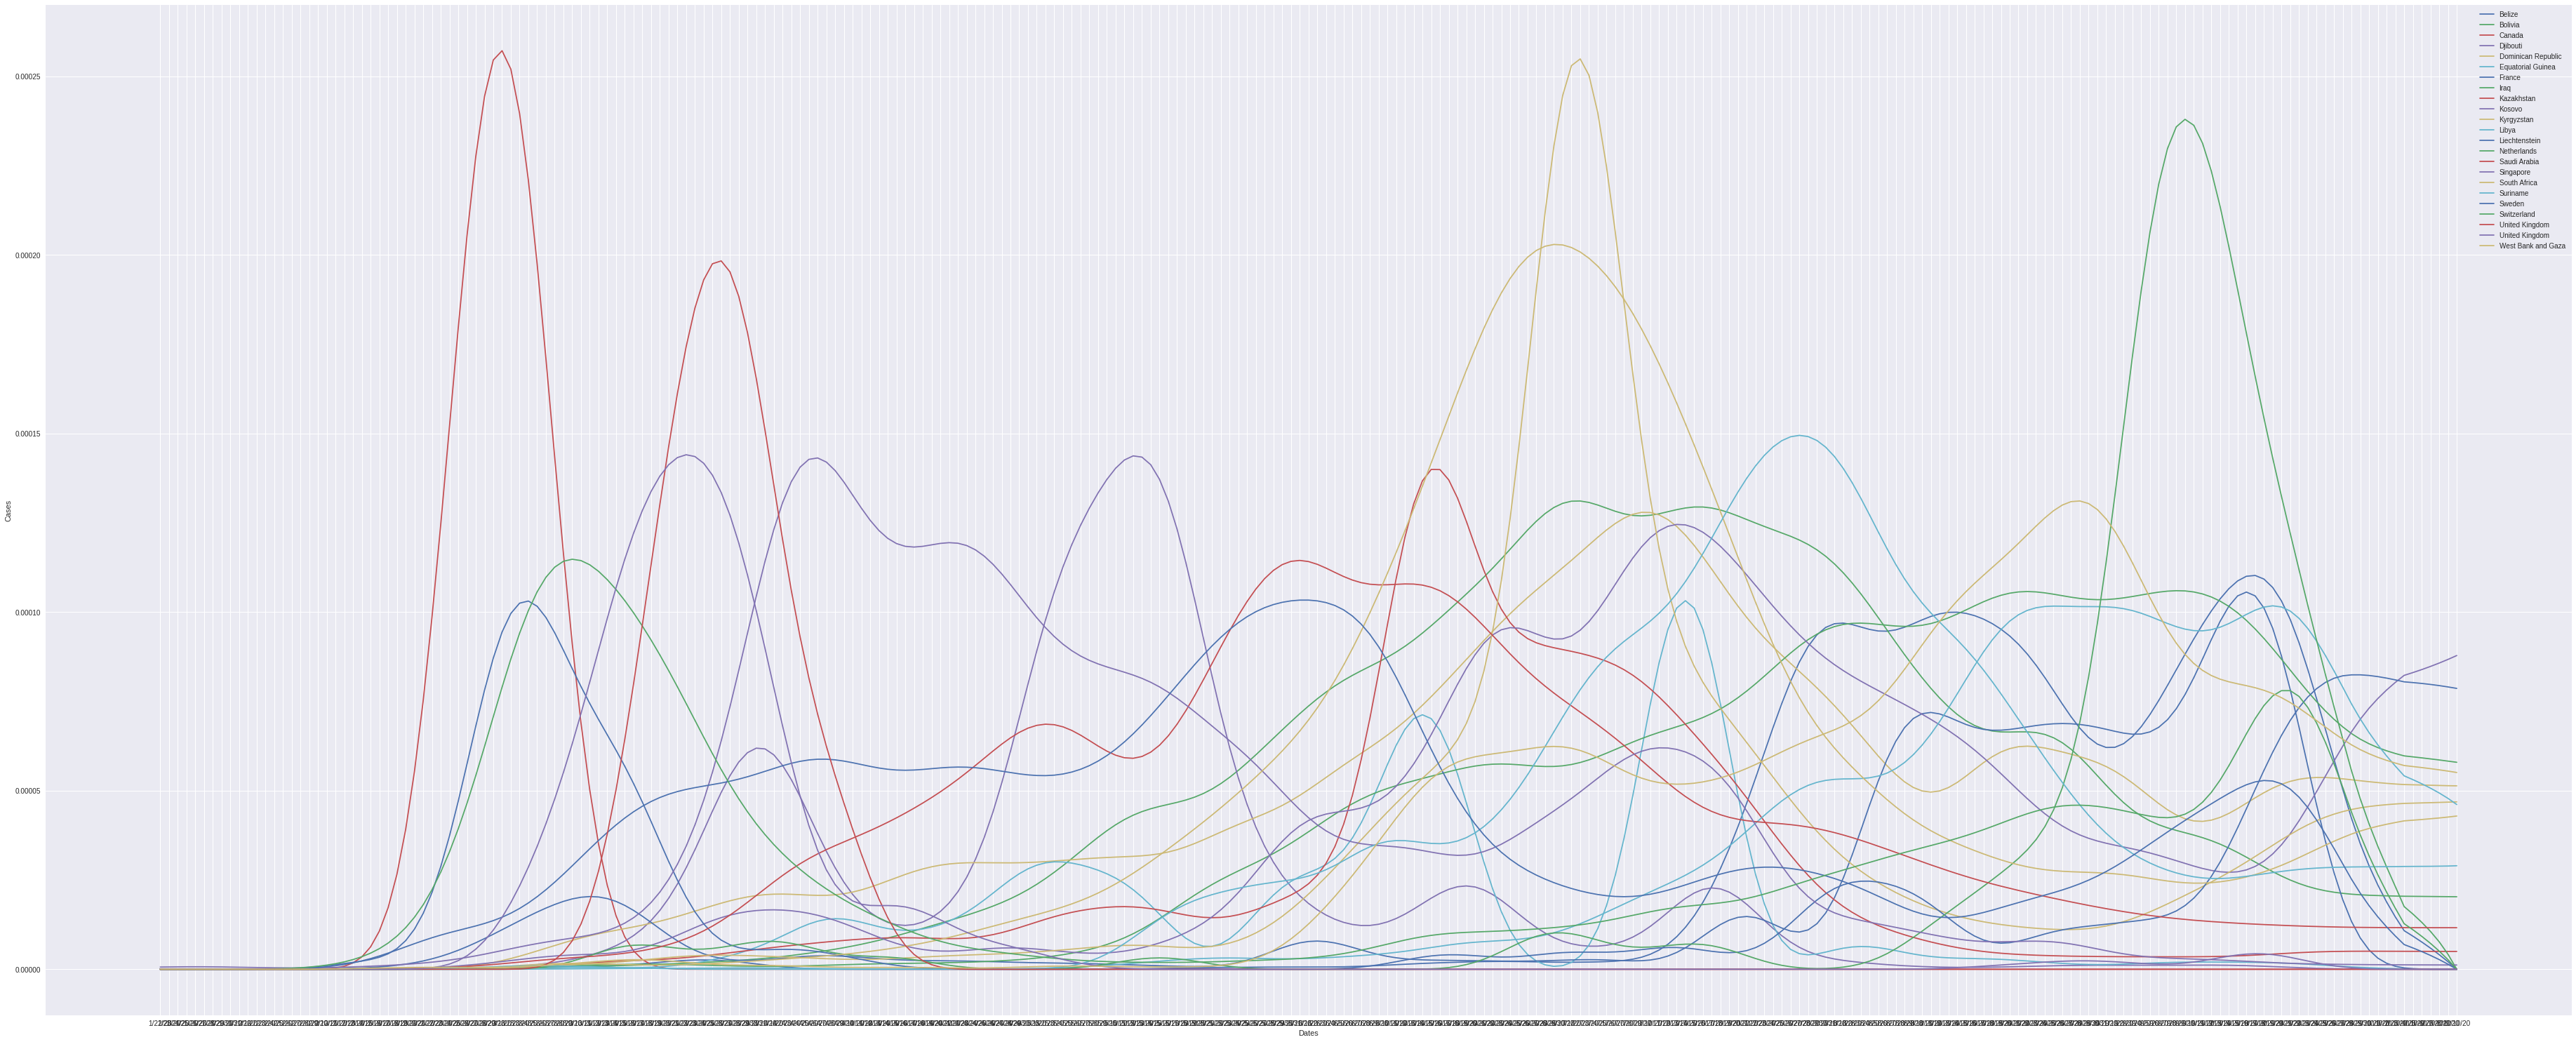

In [13]:
get_graphs(df, cluster_num=0)

In [14]:
get_graphs(df, cluster_num=1)

Output hidden; open in https://colab.research.google.com to view.

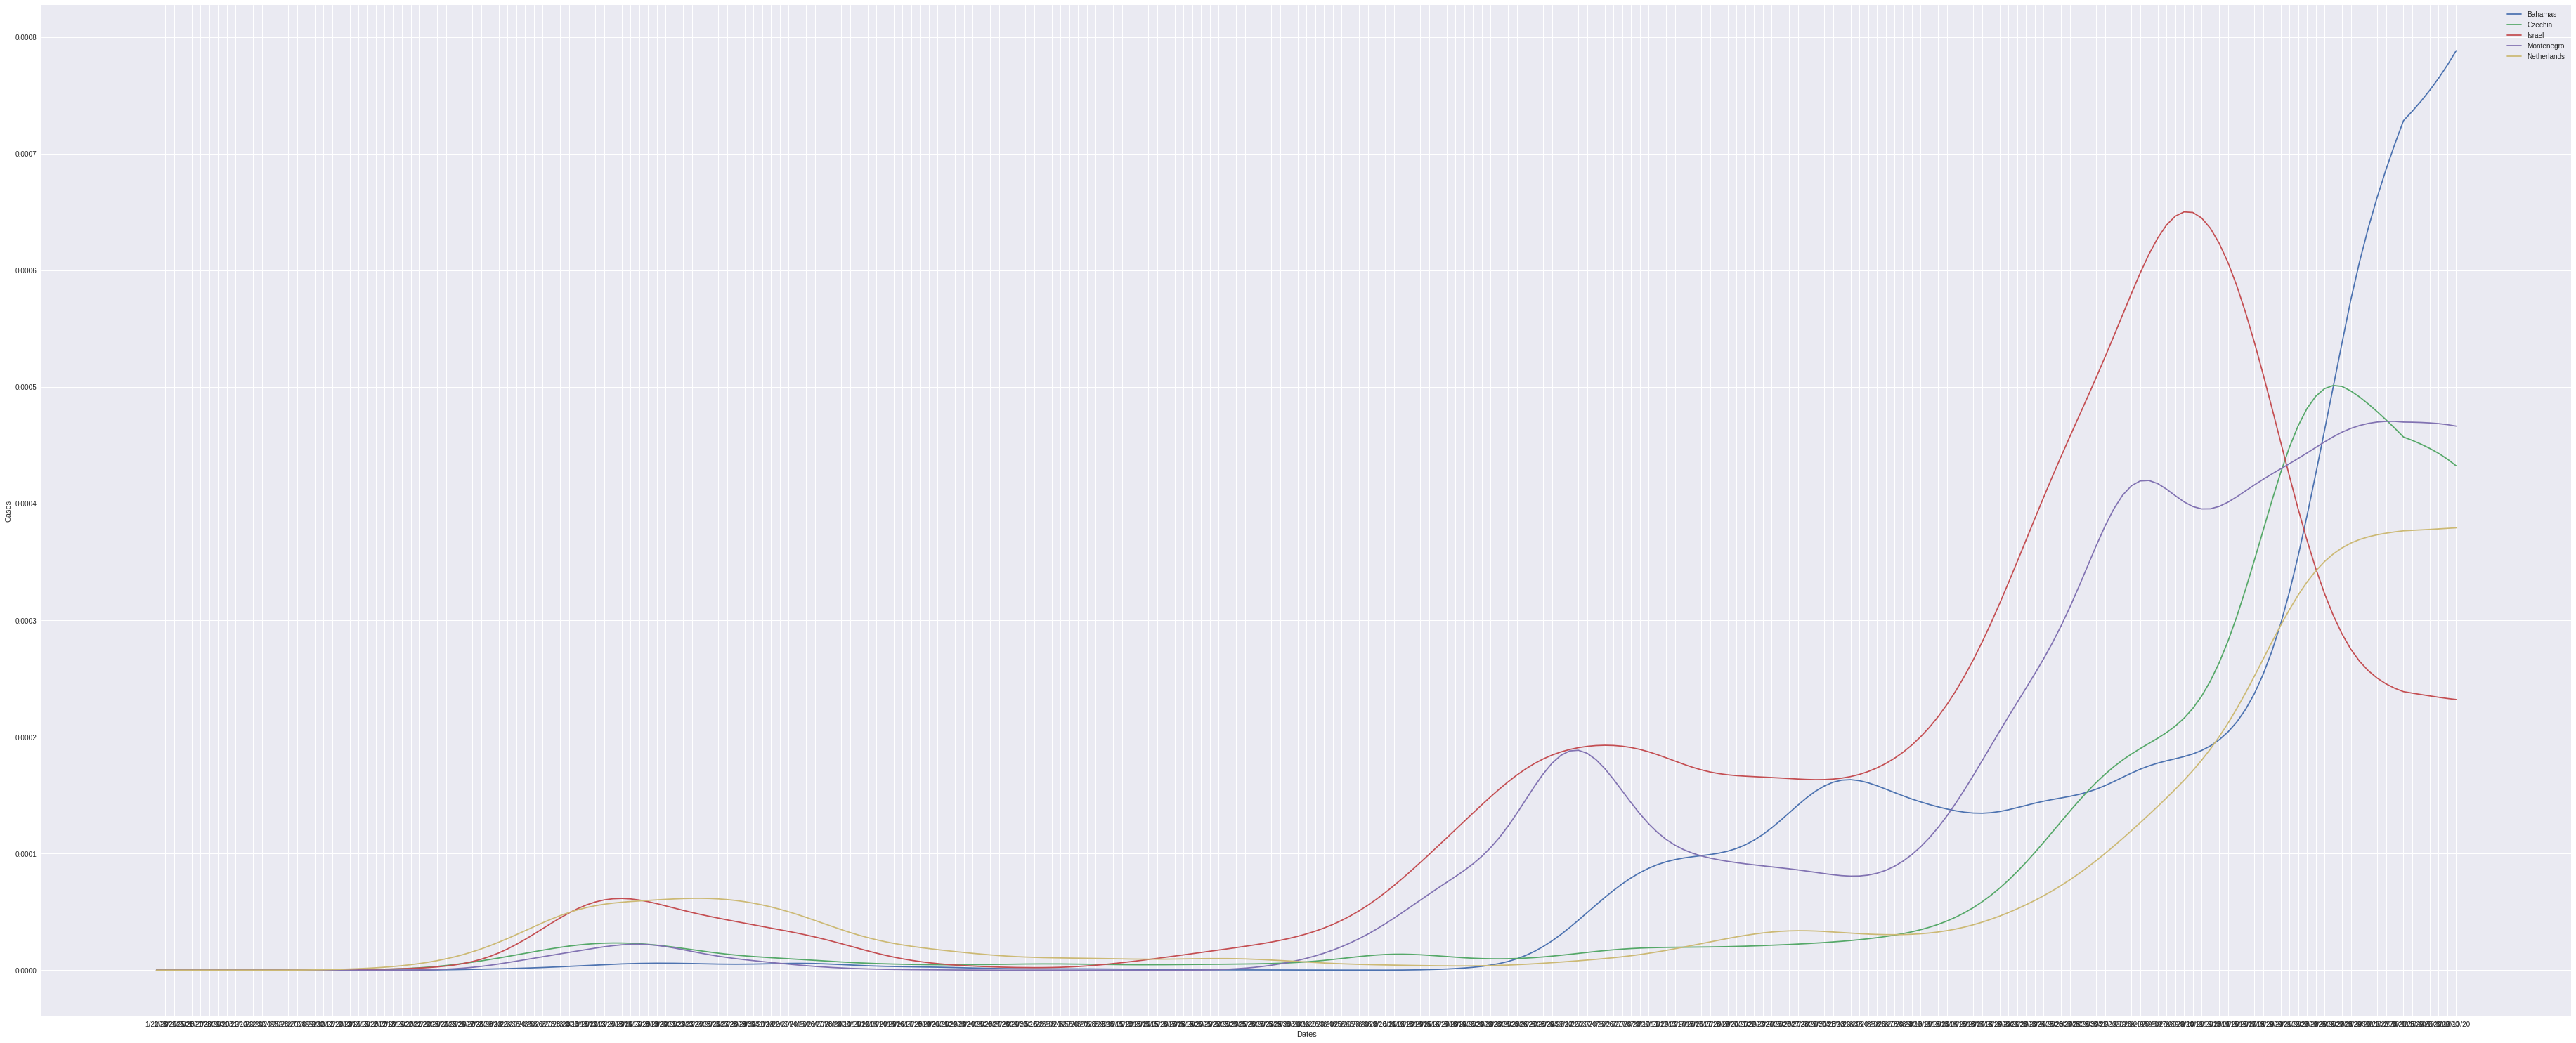

In [15]:
get_graphs(df, cluster_num=2)

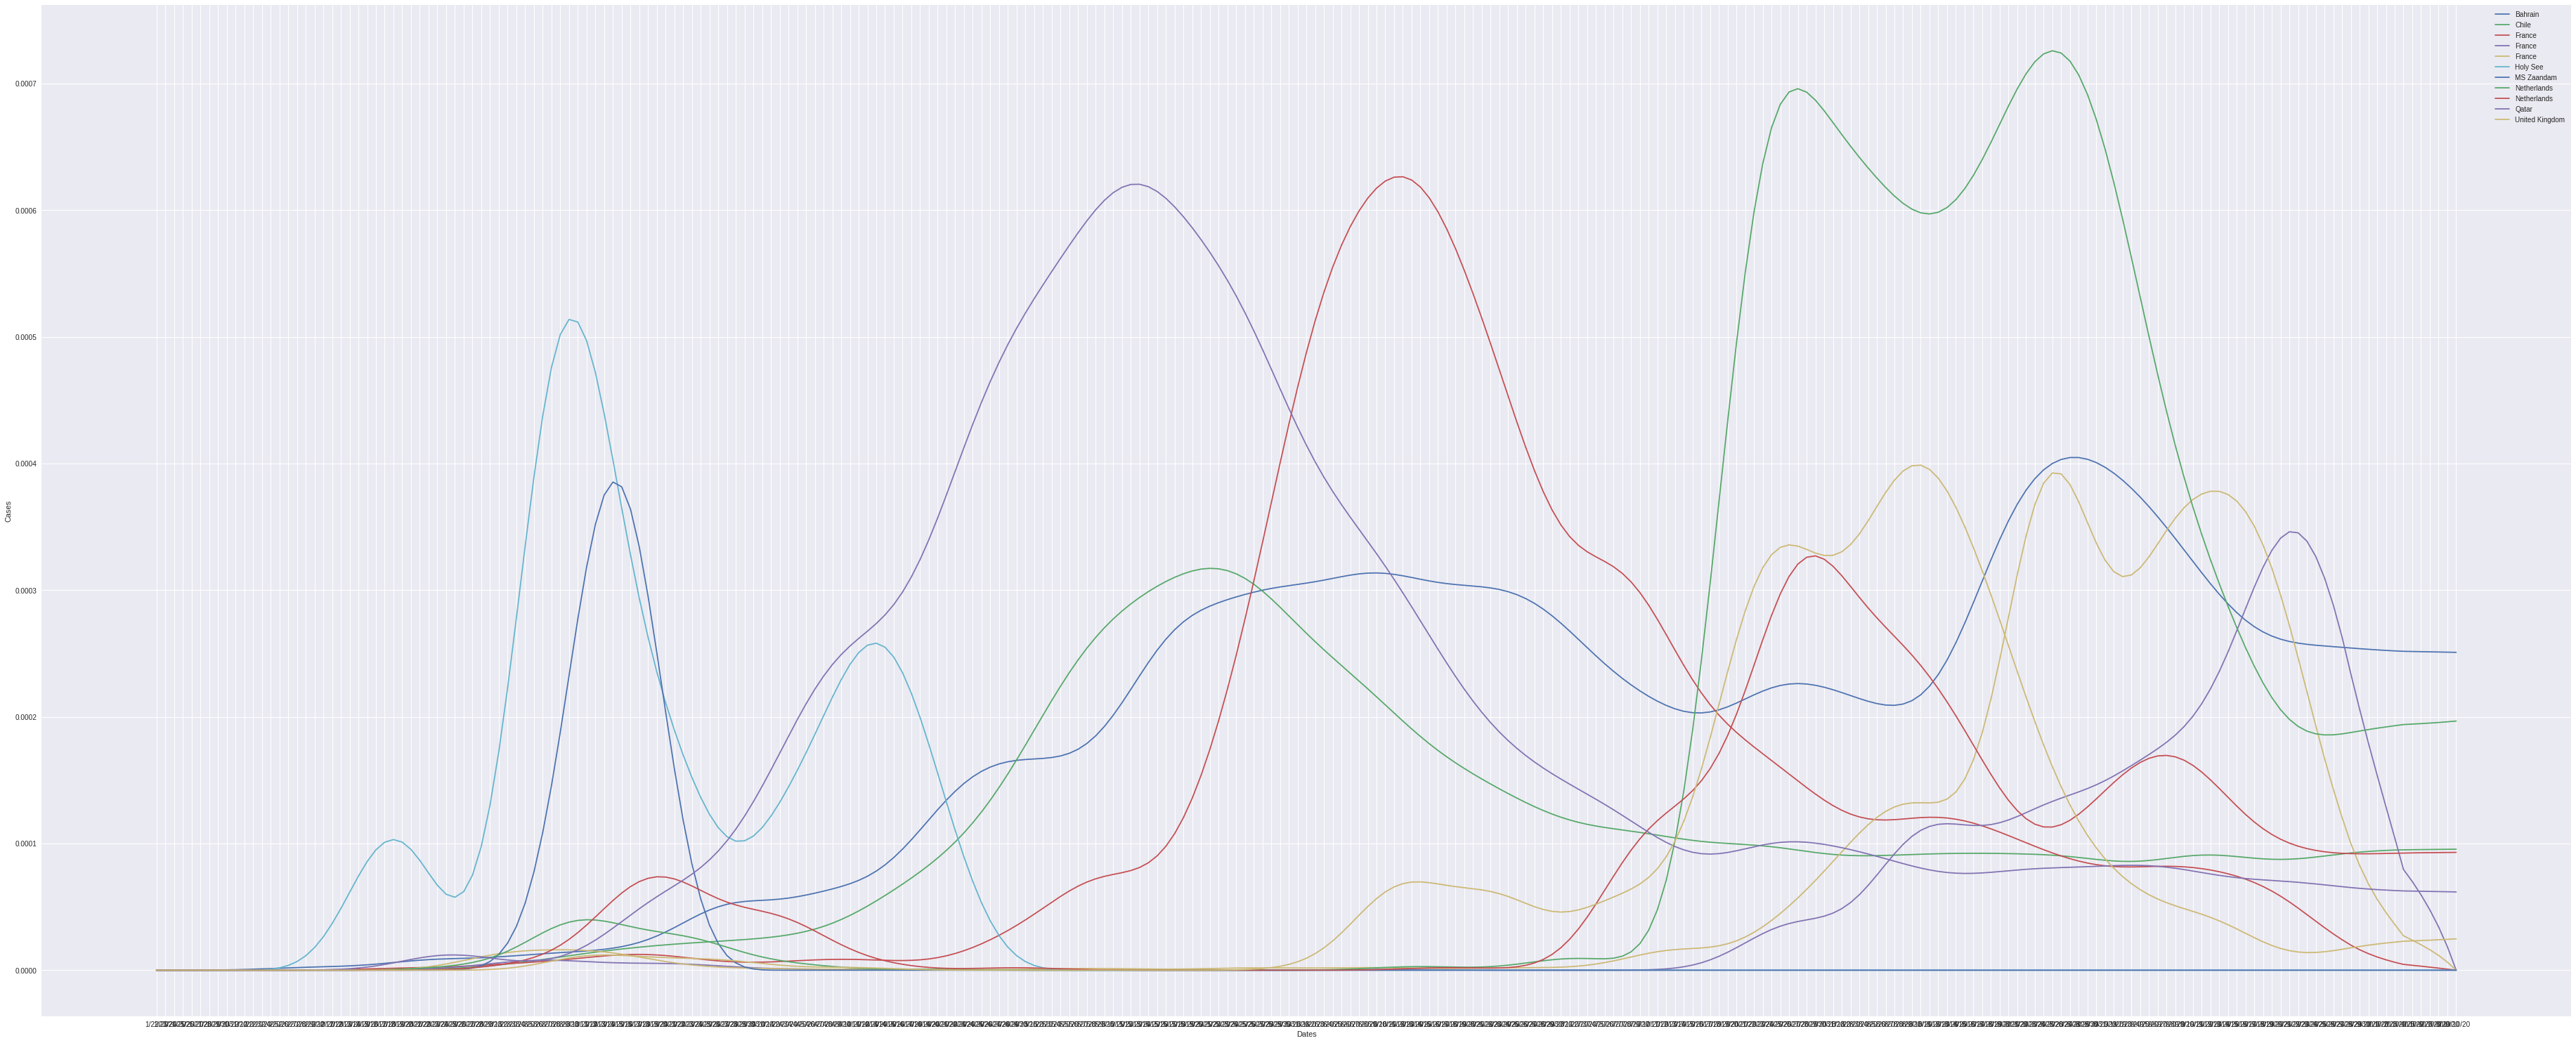

In [16]:
get_graphs(df, cluster_num=3)

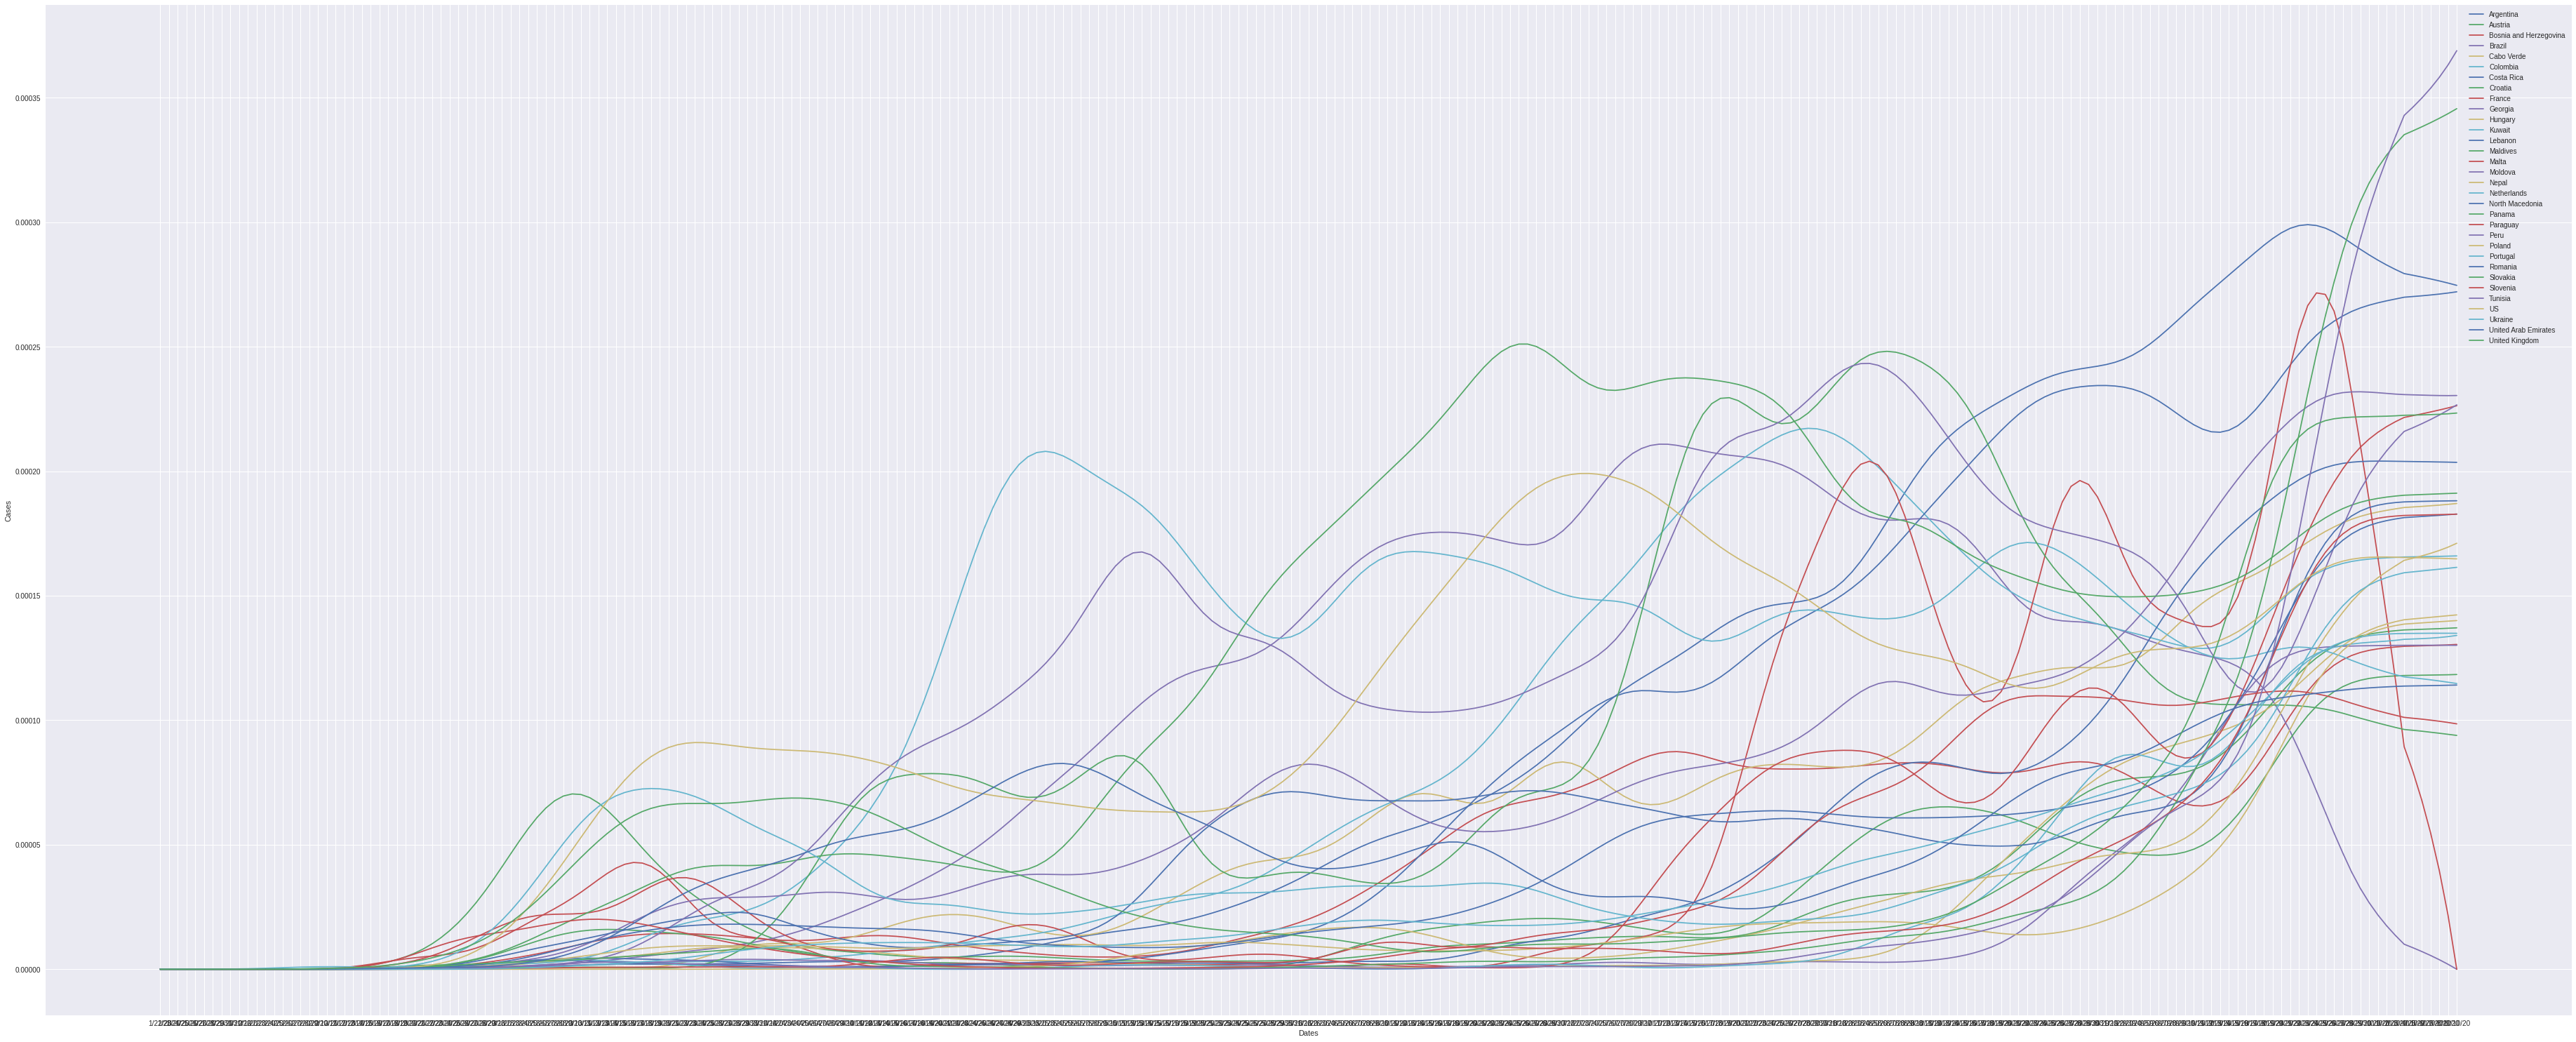

In [17]:
get_graphs(df, cluster_num=4)

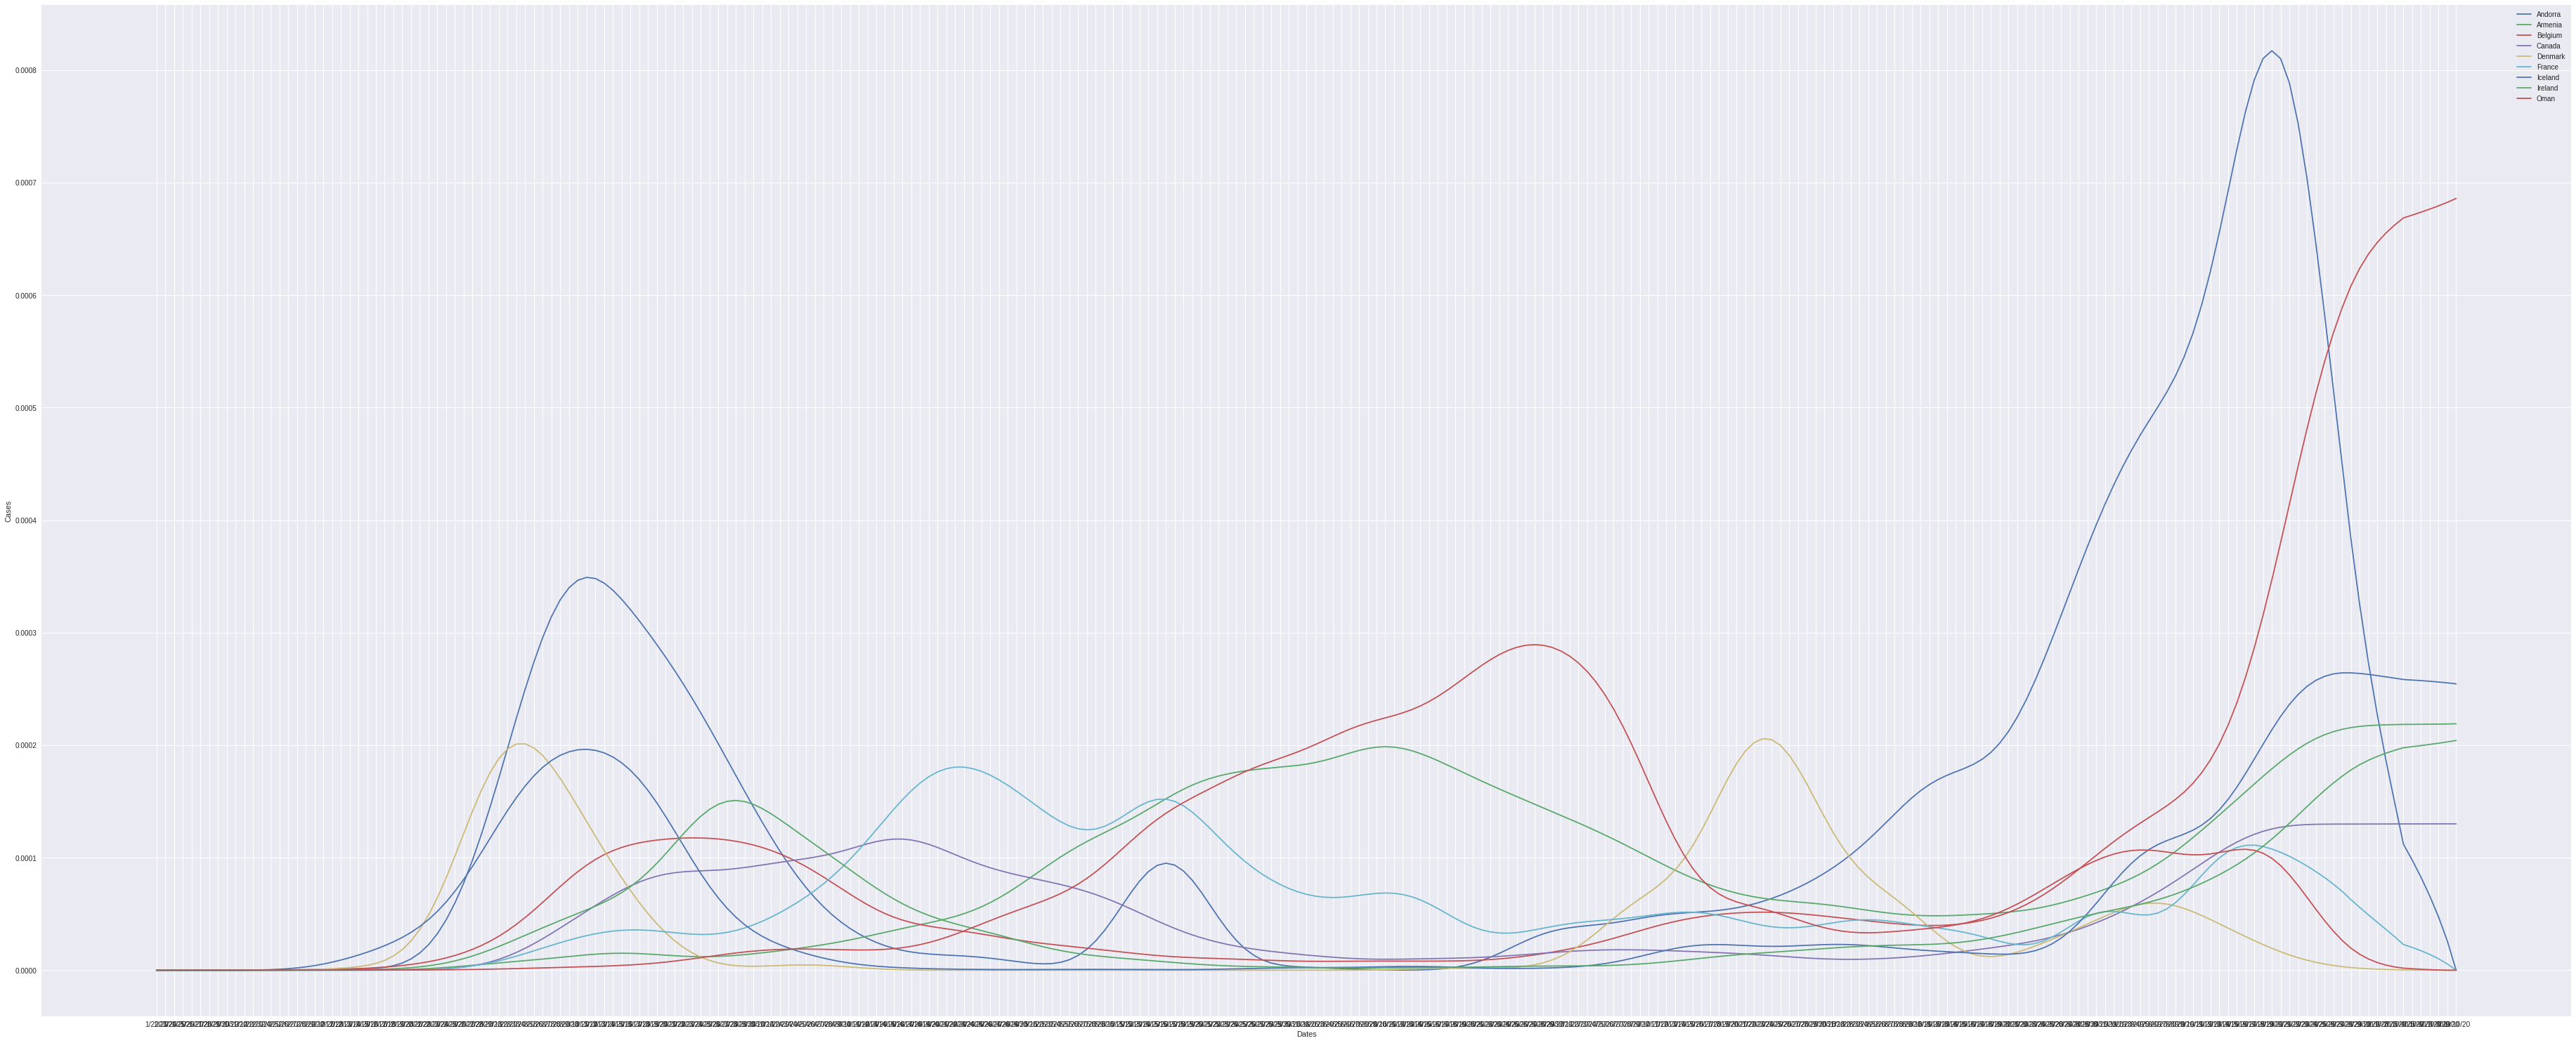

In [18]:
get_graphs(df, cluster_num=5)

# Deaths

In [19]:
file_path = os.path.join(BASE_DIR, 'deaths_added_features.csv')
df = pd.read_csv(file_path, index_col=0)
df.head()

Province/State Country/Region       Lat  ...  shift 21  shift 22 shift 23
0    no province    Afghanistan  33.93911  ...        -1        -1       -1
1    no province        Albania  41.15330  ...        -1        -1       -1
2    no province        Algeria  28.03390  ...        -1        -1       -1
3    no province        Andorra  42.50630  ...        -1        -1       -1
4    no province         Angola -11.20270  ...        -1        -1       -1

[5 rows x 294 columns]

In [20]:
data = df.iloc[:, 271:]
data.head()

shift 1  shift 2  shift 3  shift 4  ...  shift 20  shift 21  shift 22  shift 23
0        0        0        0        0  ...        -1        -1        -1        -1
1        0        0        0        0  ...        -1        -1        -1        -1
2        0        0        0        0  ...        -1        -1        -1        -1
3        0        0        1        4  ...         0        -1        -1        -1
4        0        0        0        0  ...        -1        -1        -1        -1

[5 rows x 23 columns]

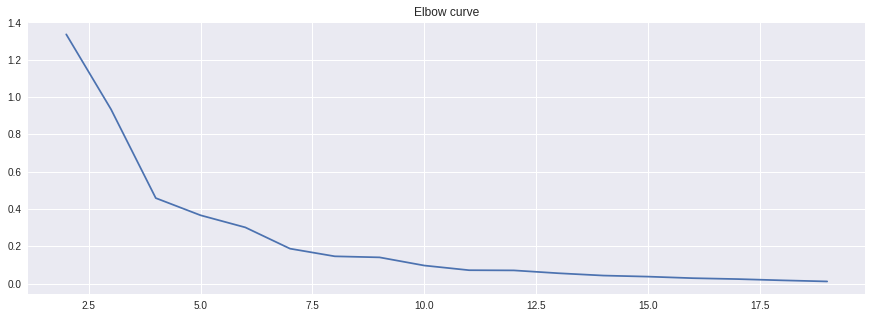

In [21]:
get_elbow(data)

In [22]:
# Number of clusters is based on the elbow method
NUM_CLUSTERS = 5

model_class = TimeSeriesModel(n_clusters=NUM_CLUSTERS, data=data)
model = model_class.build_model()

In [23]:
df['labels'] = model.labels_
df.head()

Province/State Country/Region       Lat  ...  shift 22  shift 23 labels
0    no province    Afghanistan  33.93911  ...        -1        -1      0
1    no province        Albania  41.15330  ...        -1        -1      0
2    no province        Algeria  28.03390  ...        -1        -1      0
3    no province        Andorra  42.50630  ...        -1        -1      3
4    no province         Angola -11.20270  ...        -1        -1      0

[5 rows x 295 columns]

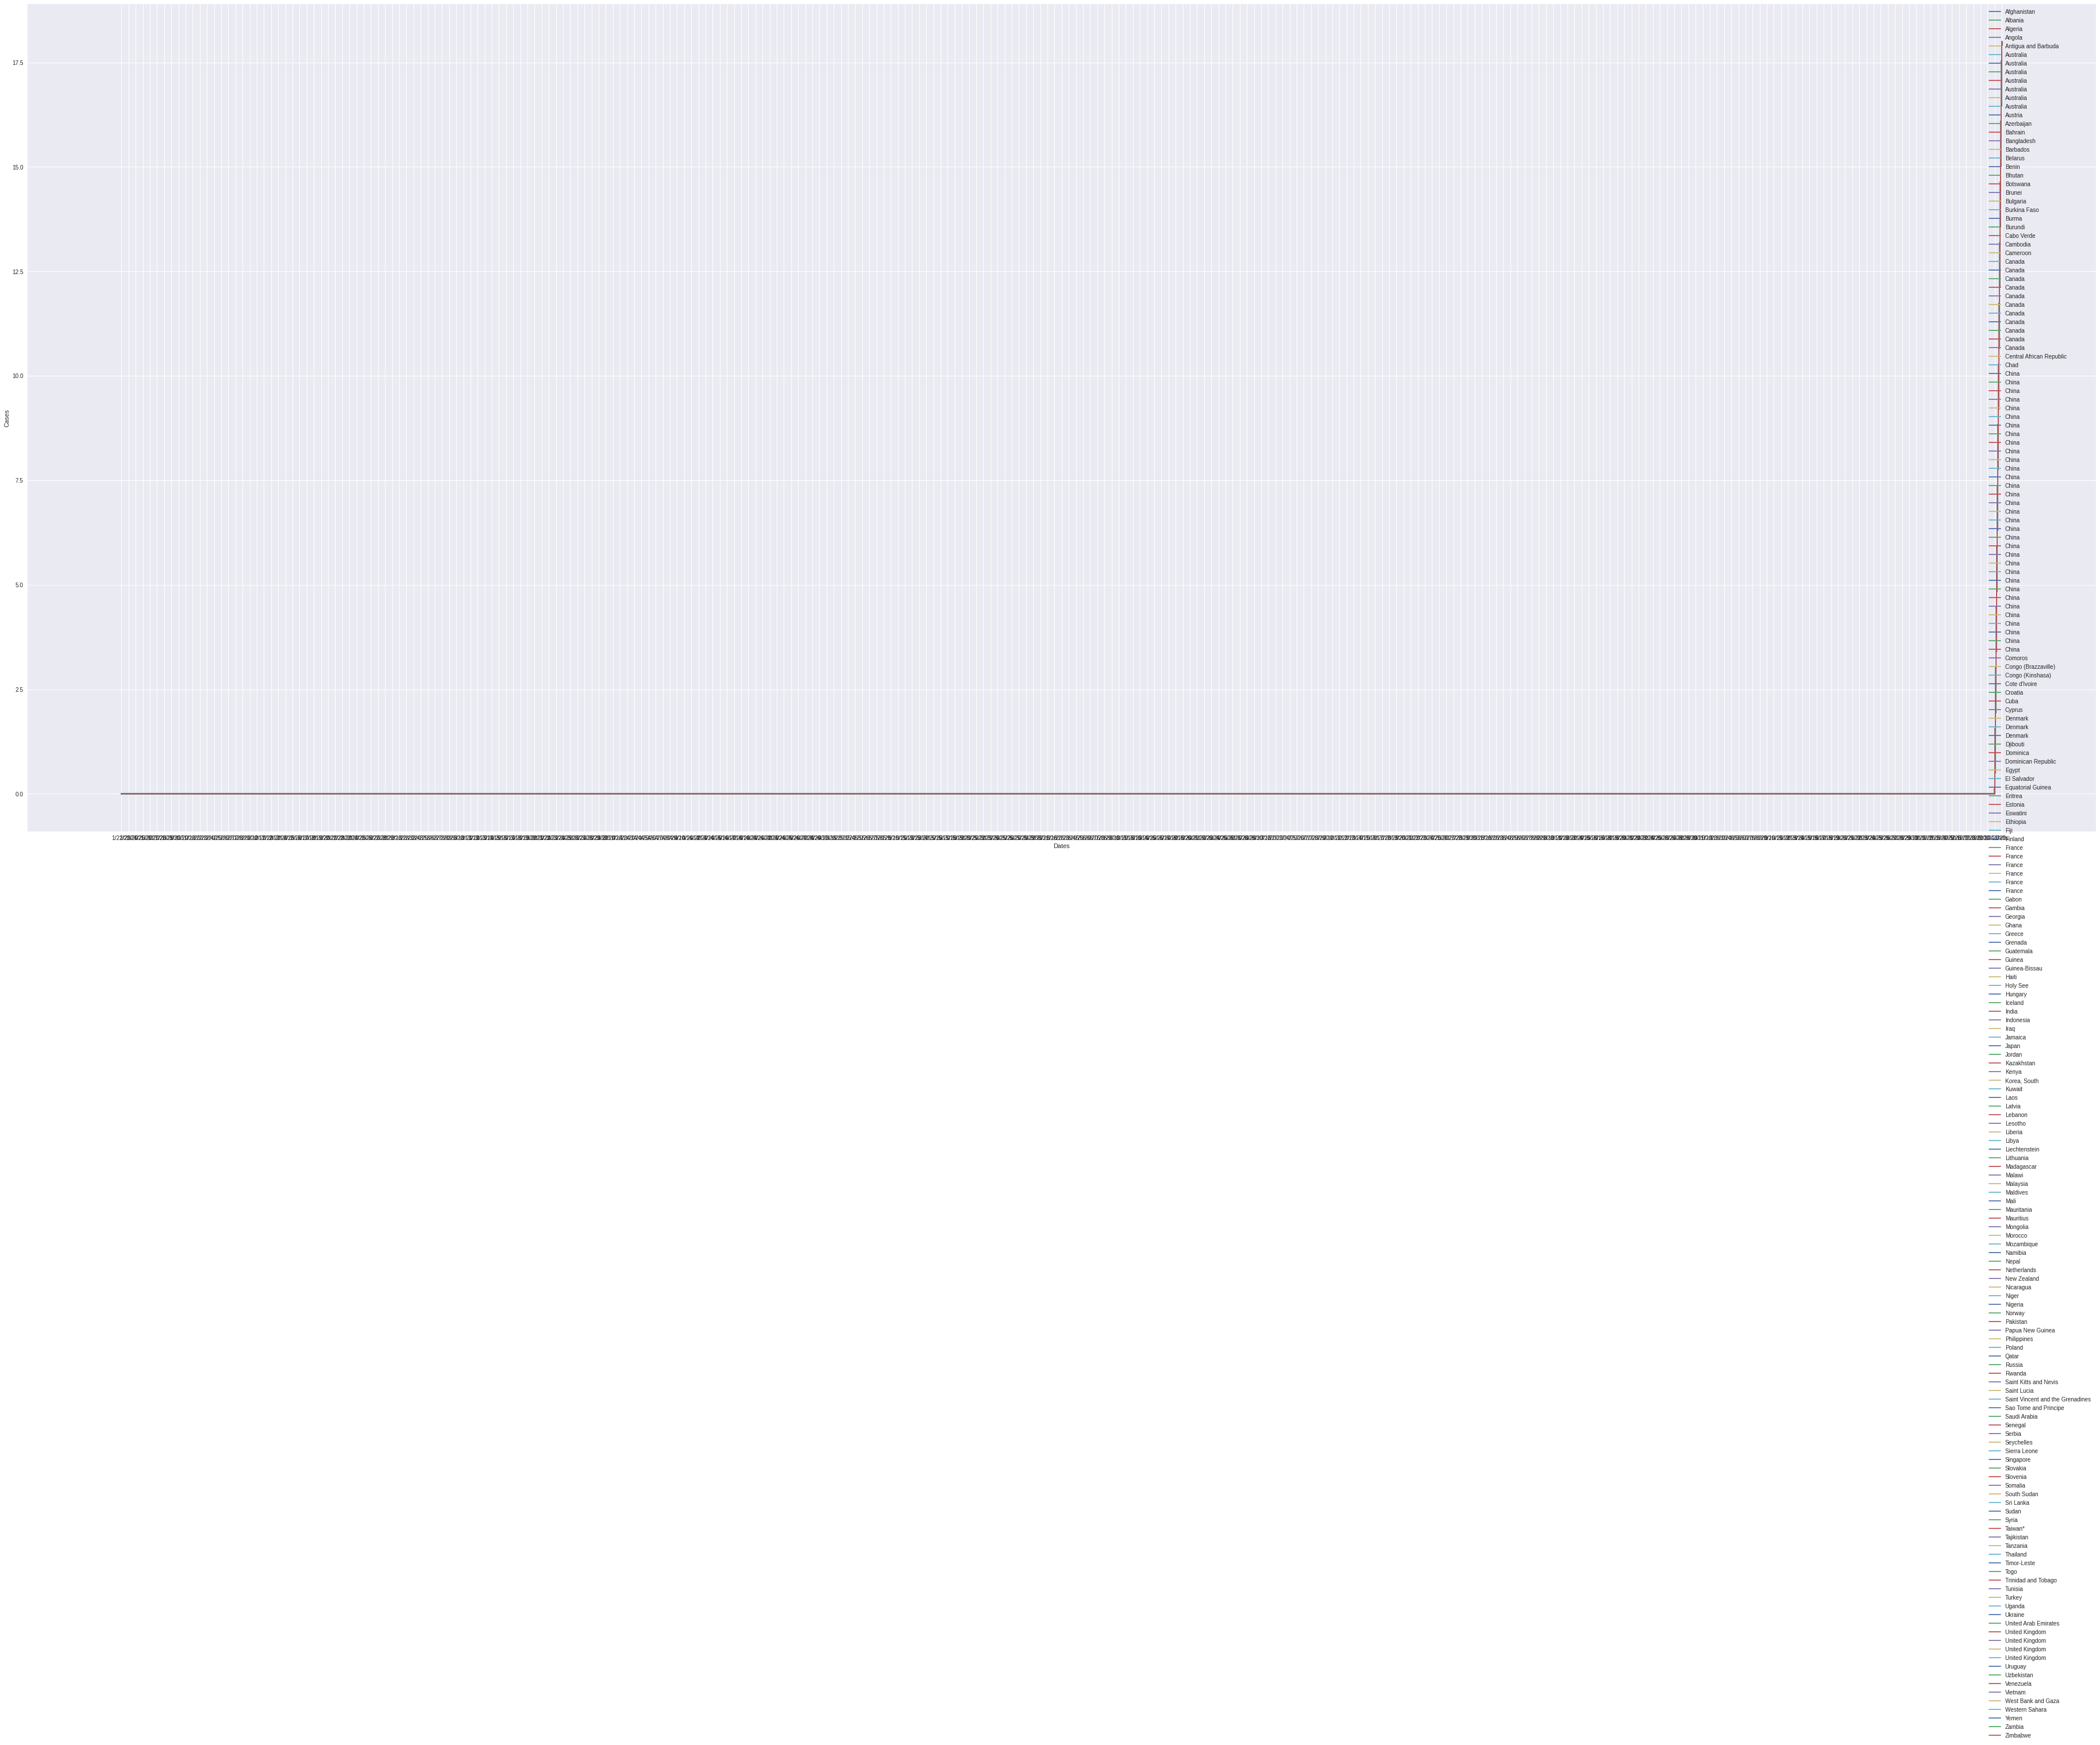

In [24]:
get_graphs(df, cluster_num=0)

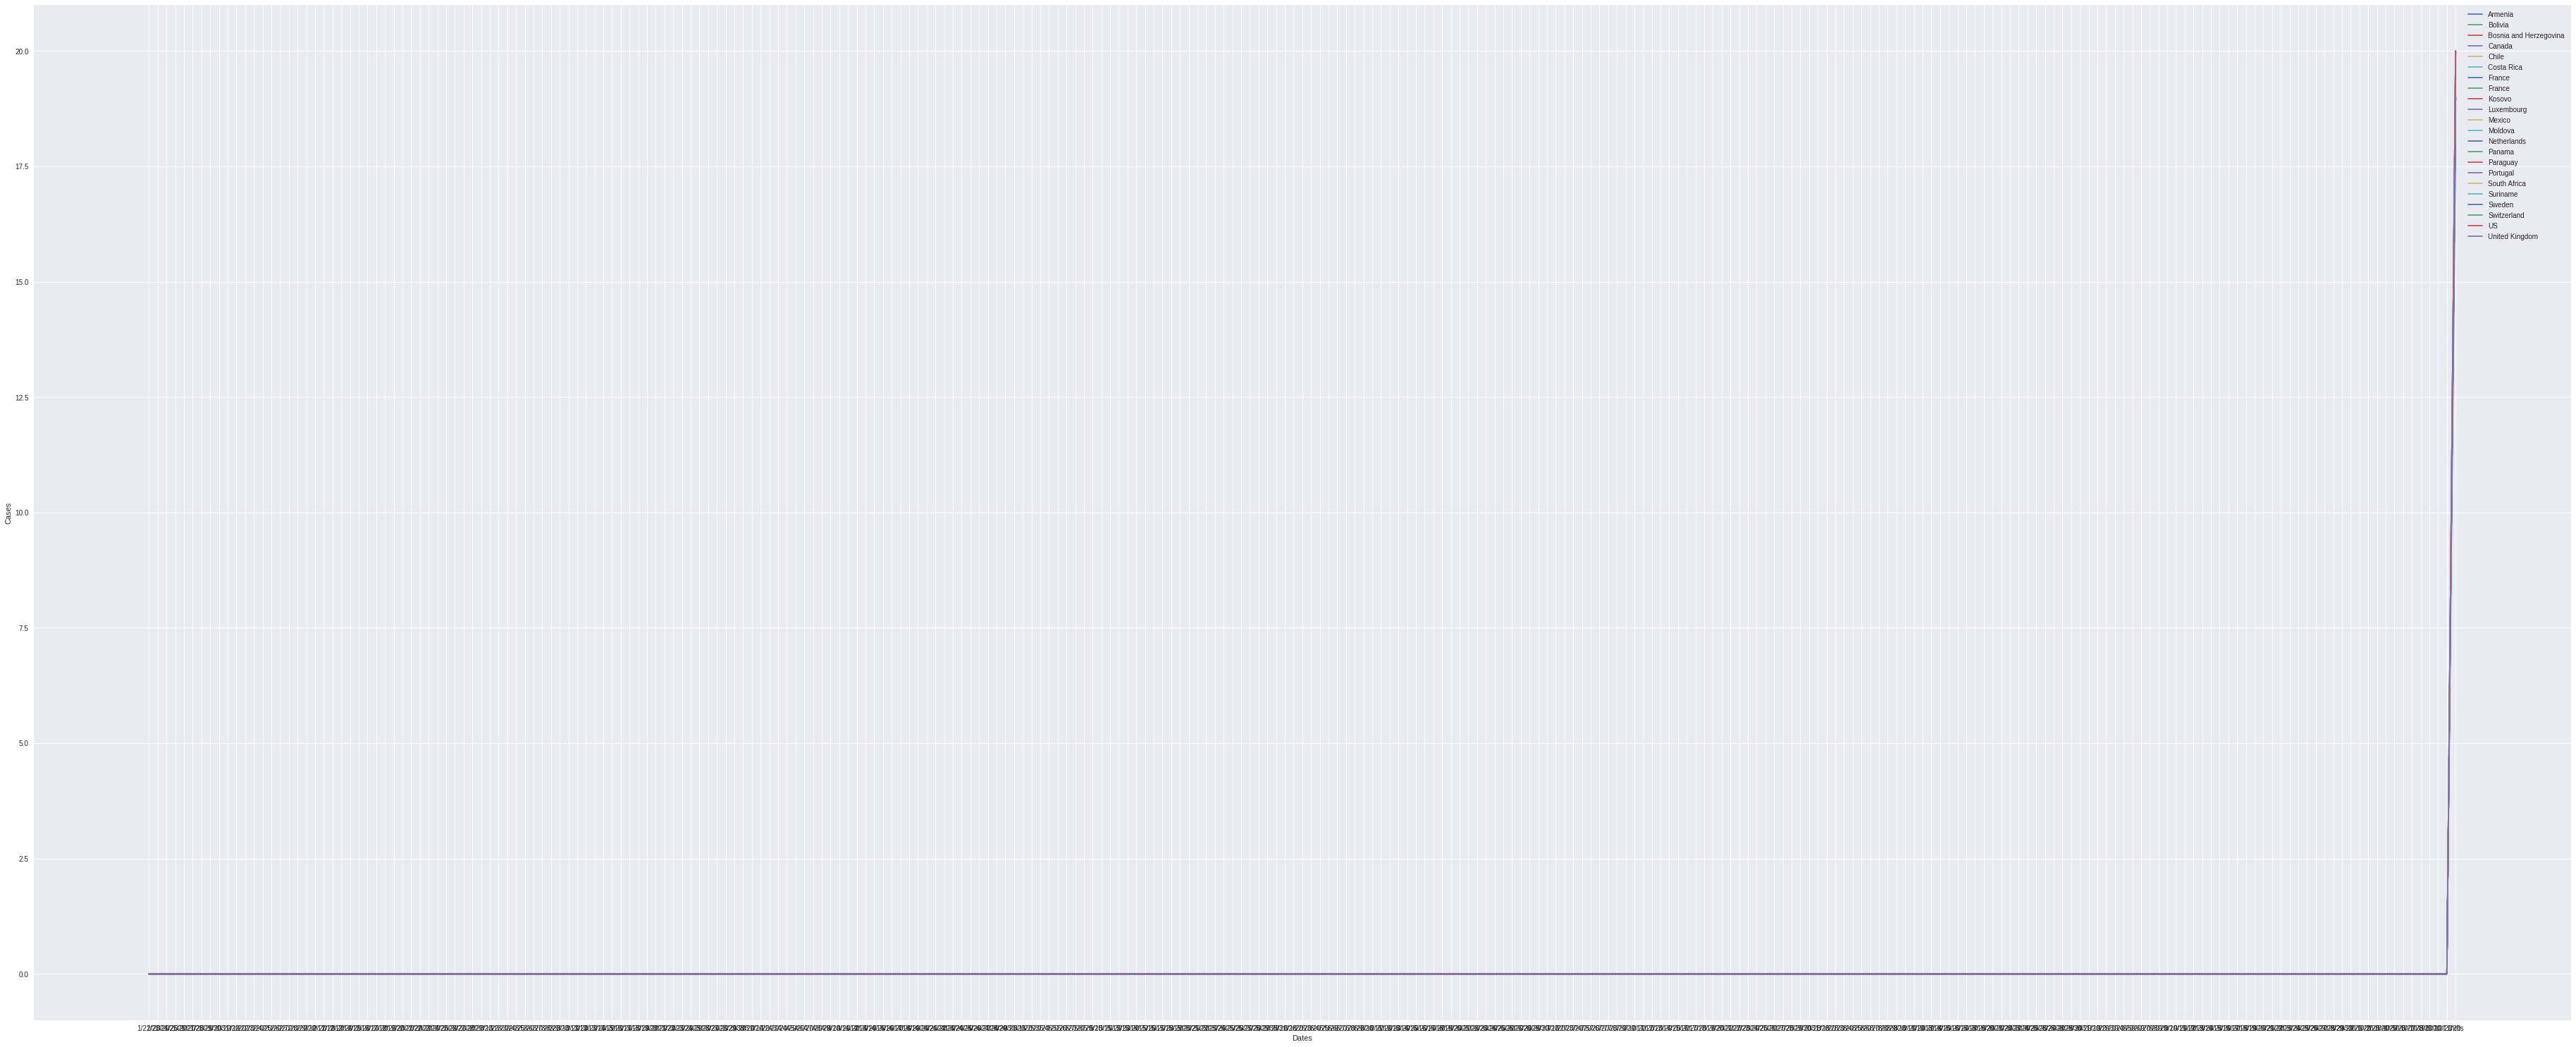

In [25]:
get_graphs(df, cluster_num=1)

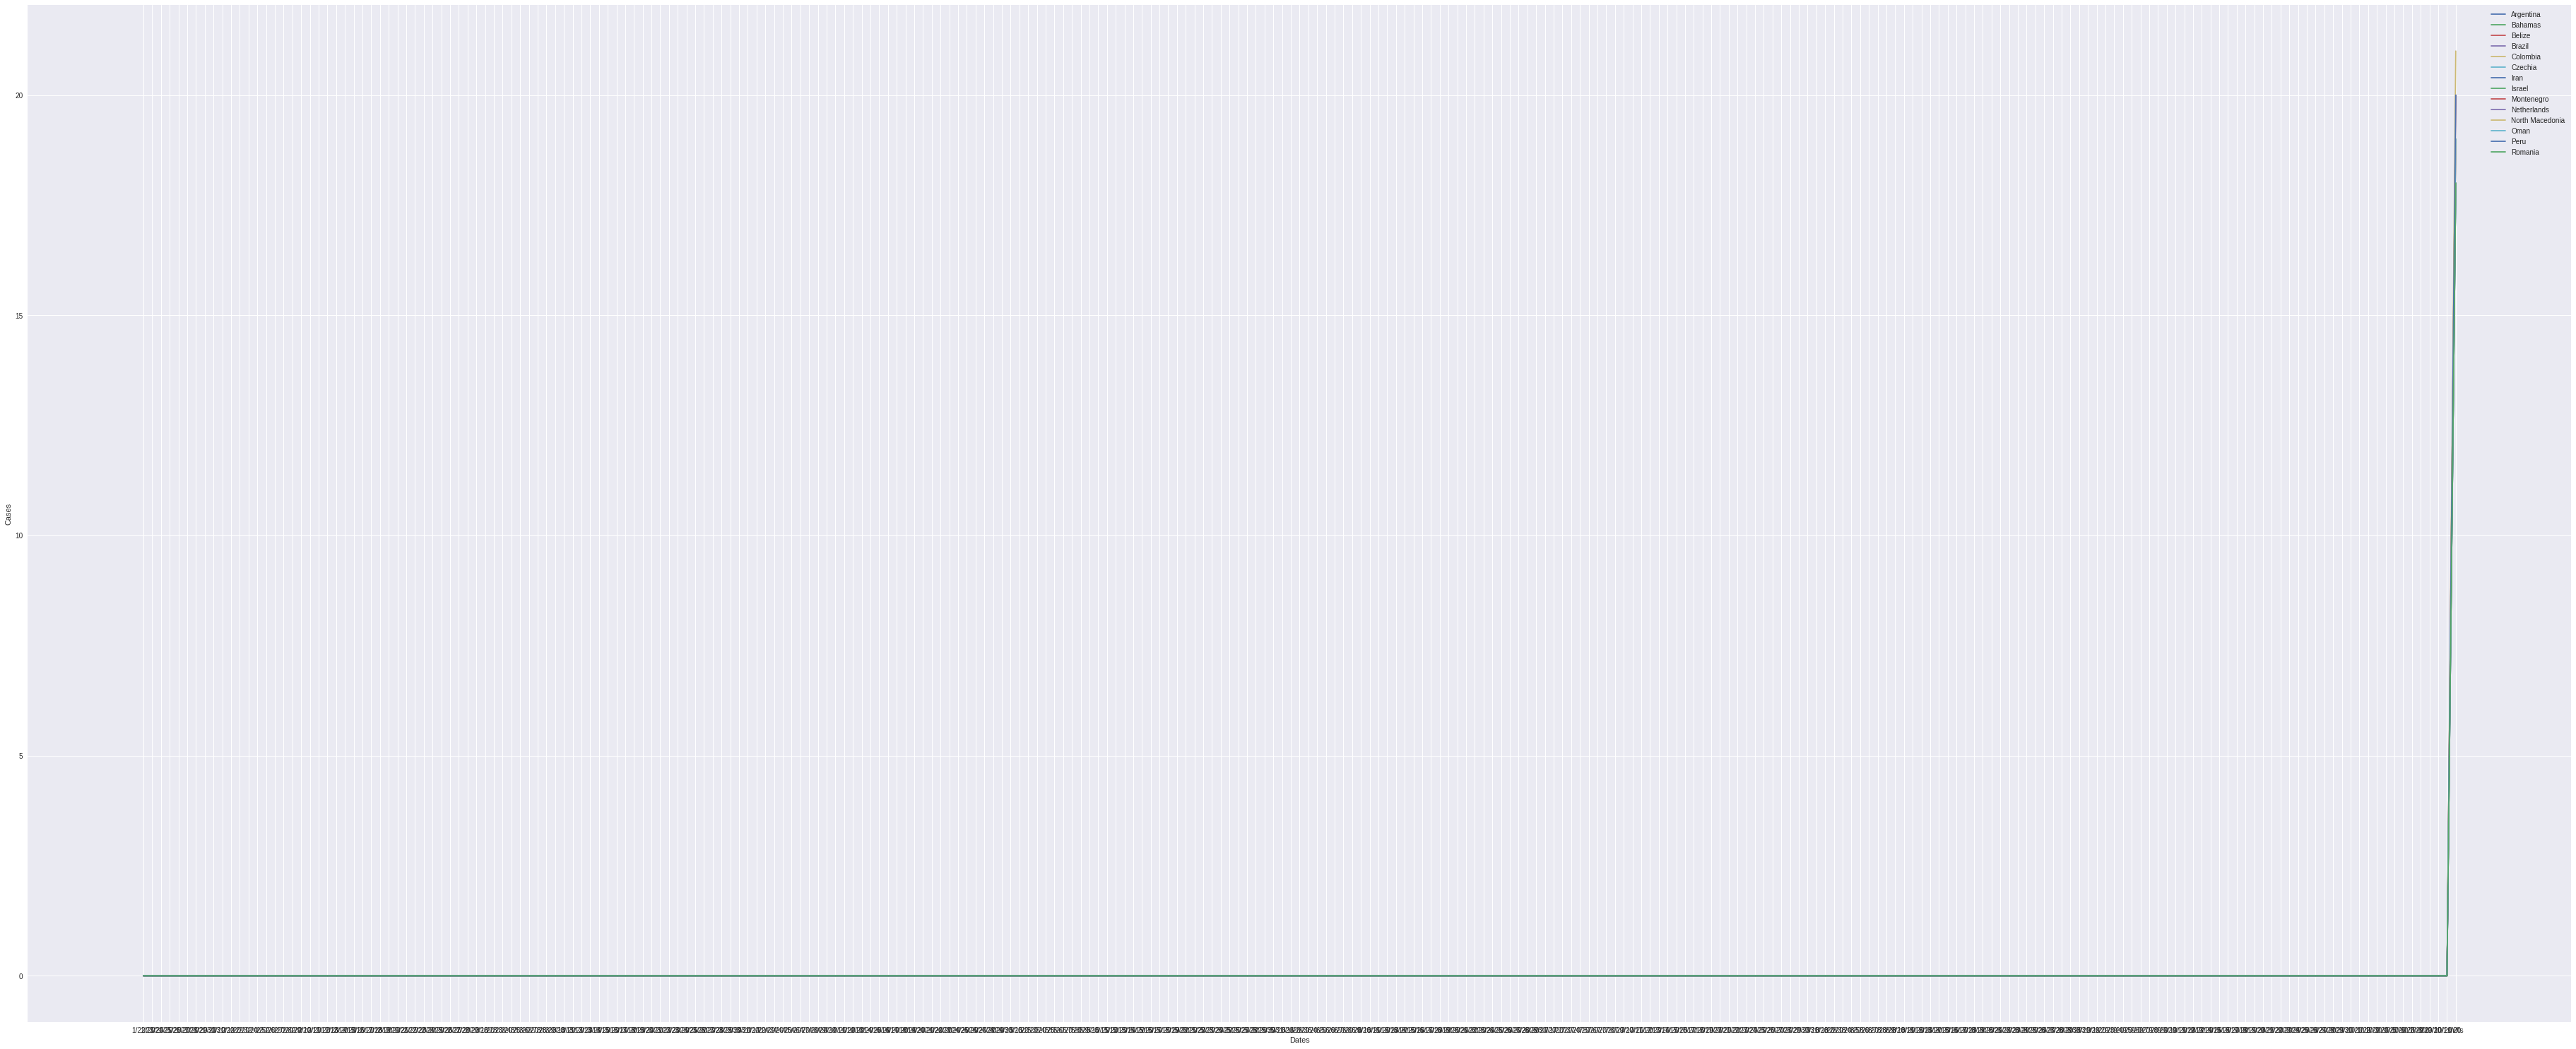

In [26]:
get_graphs(df, cluster_num=2)

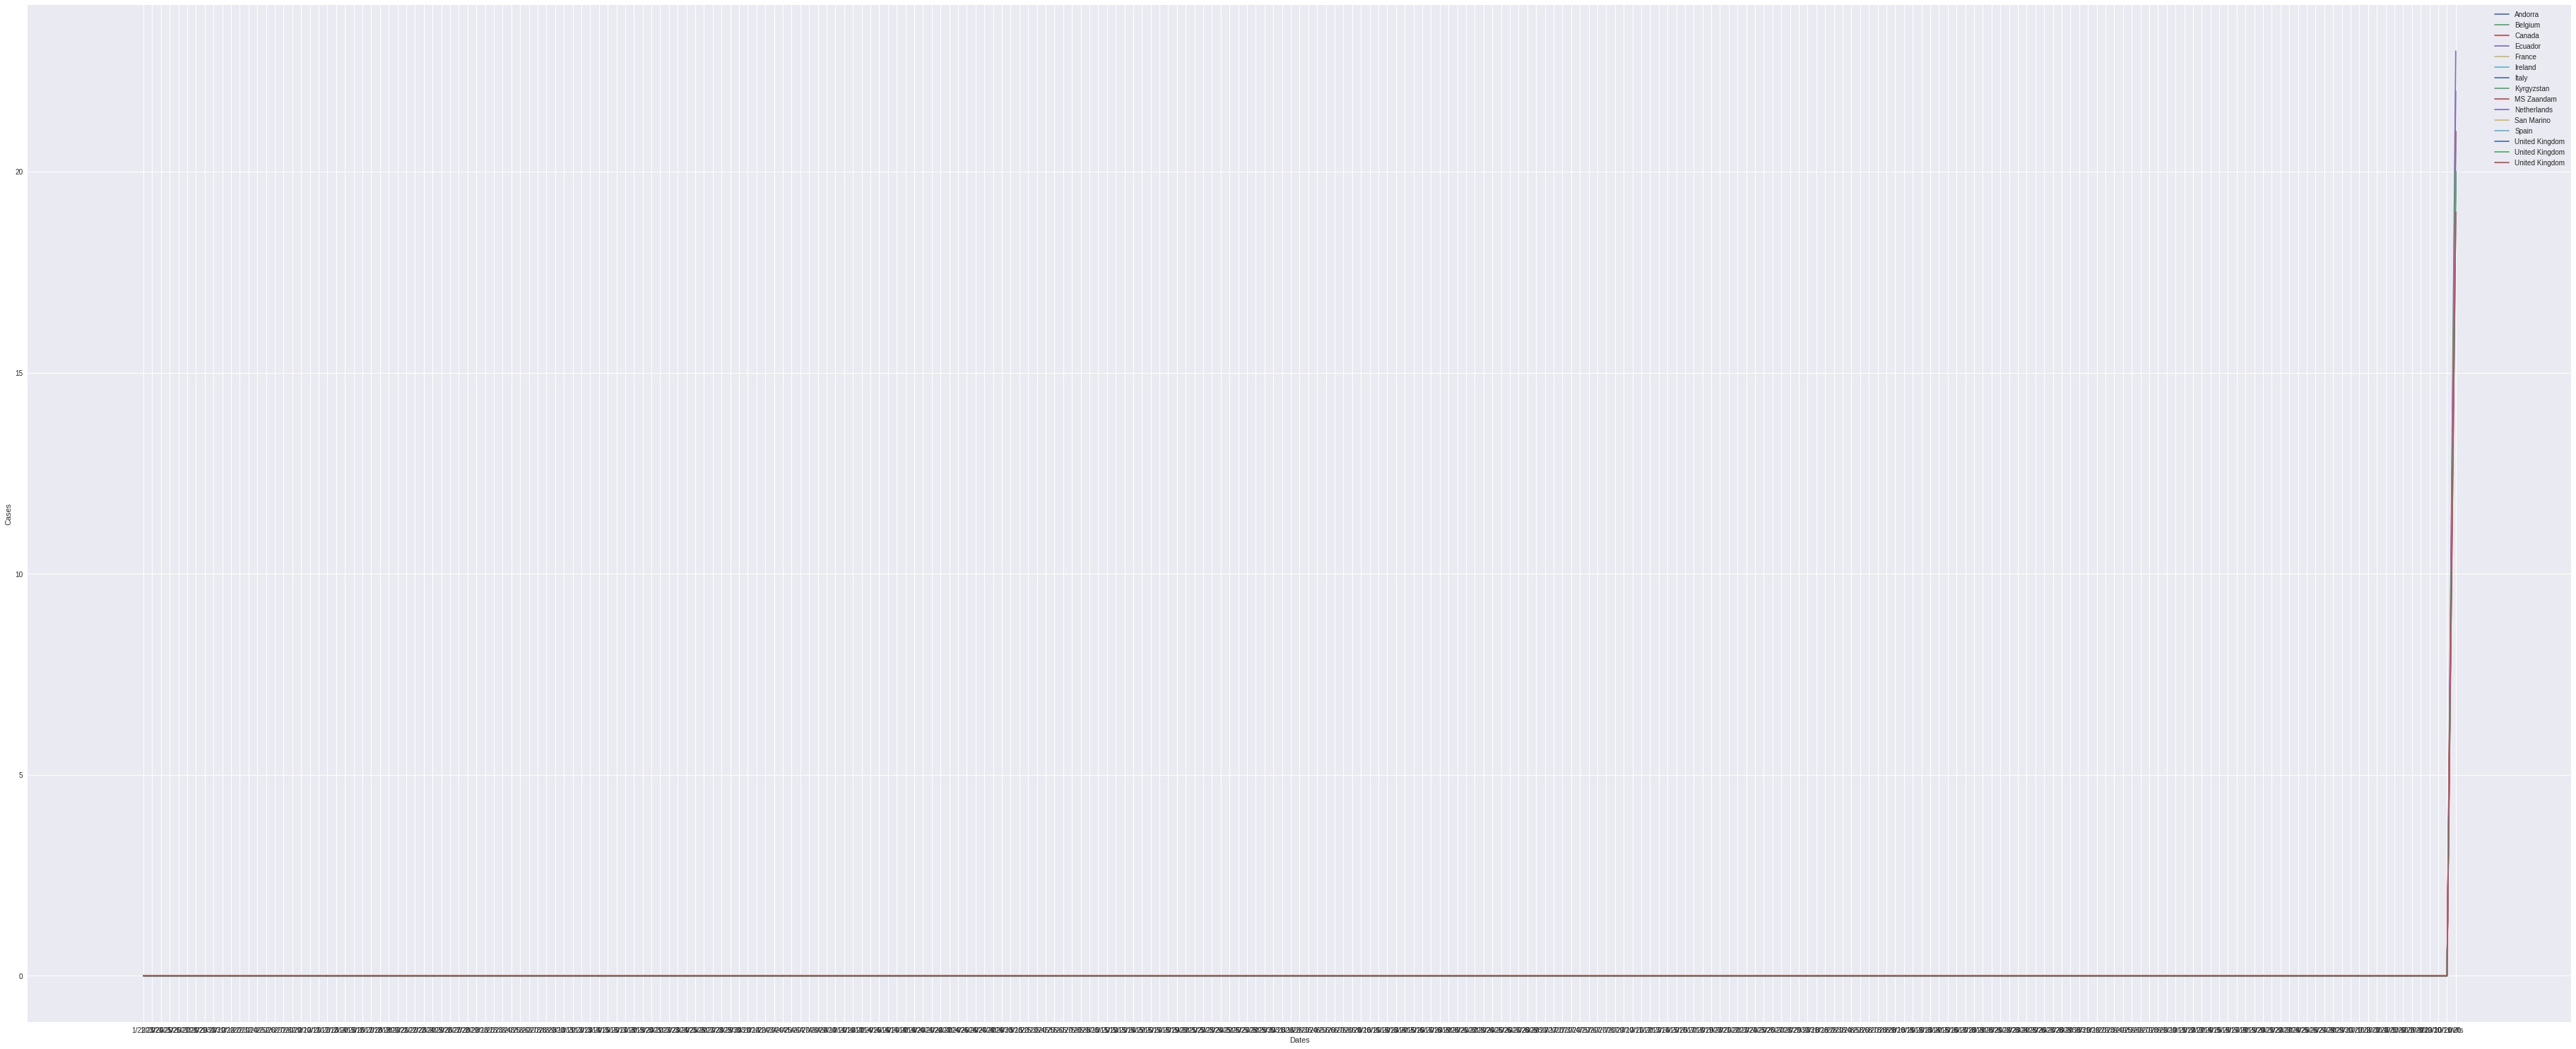

In [27]:
get_graphs(df, cluster_num=3)

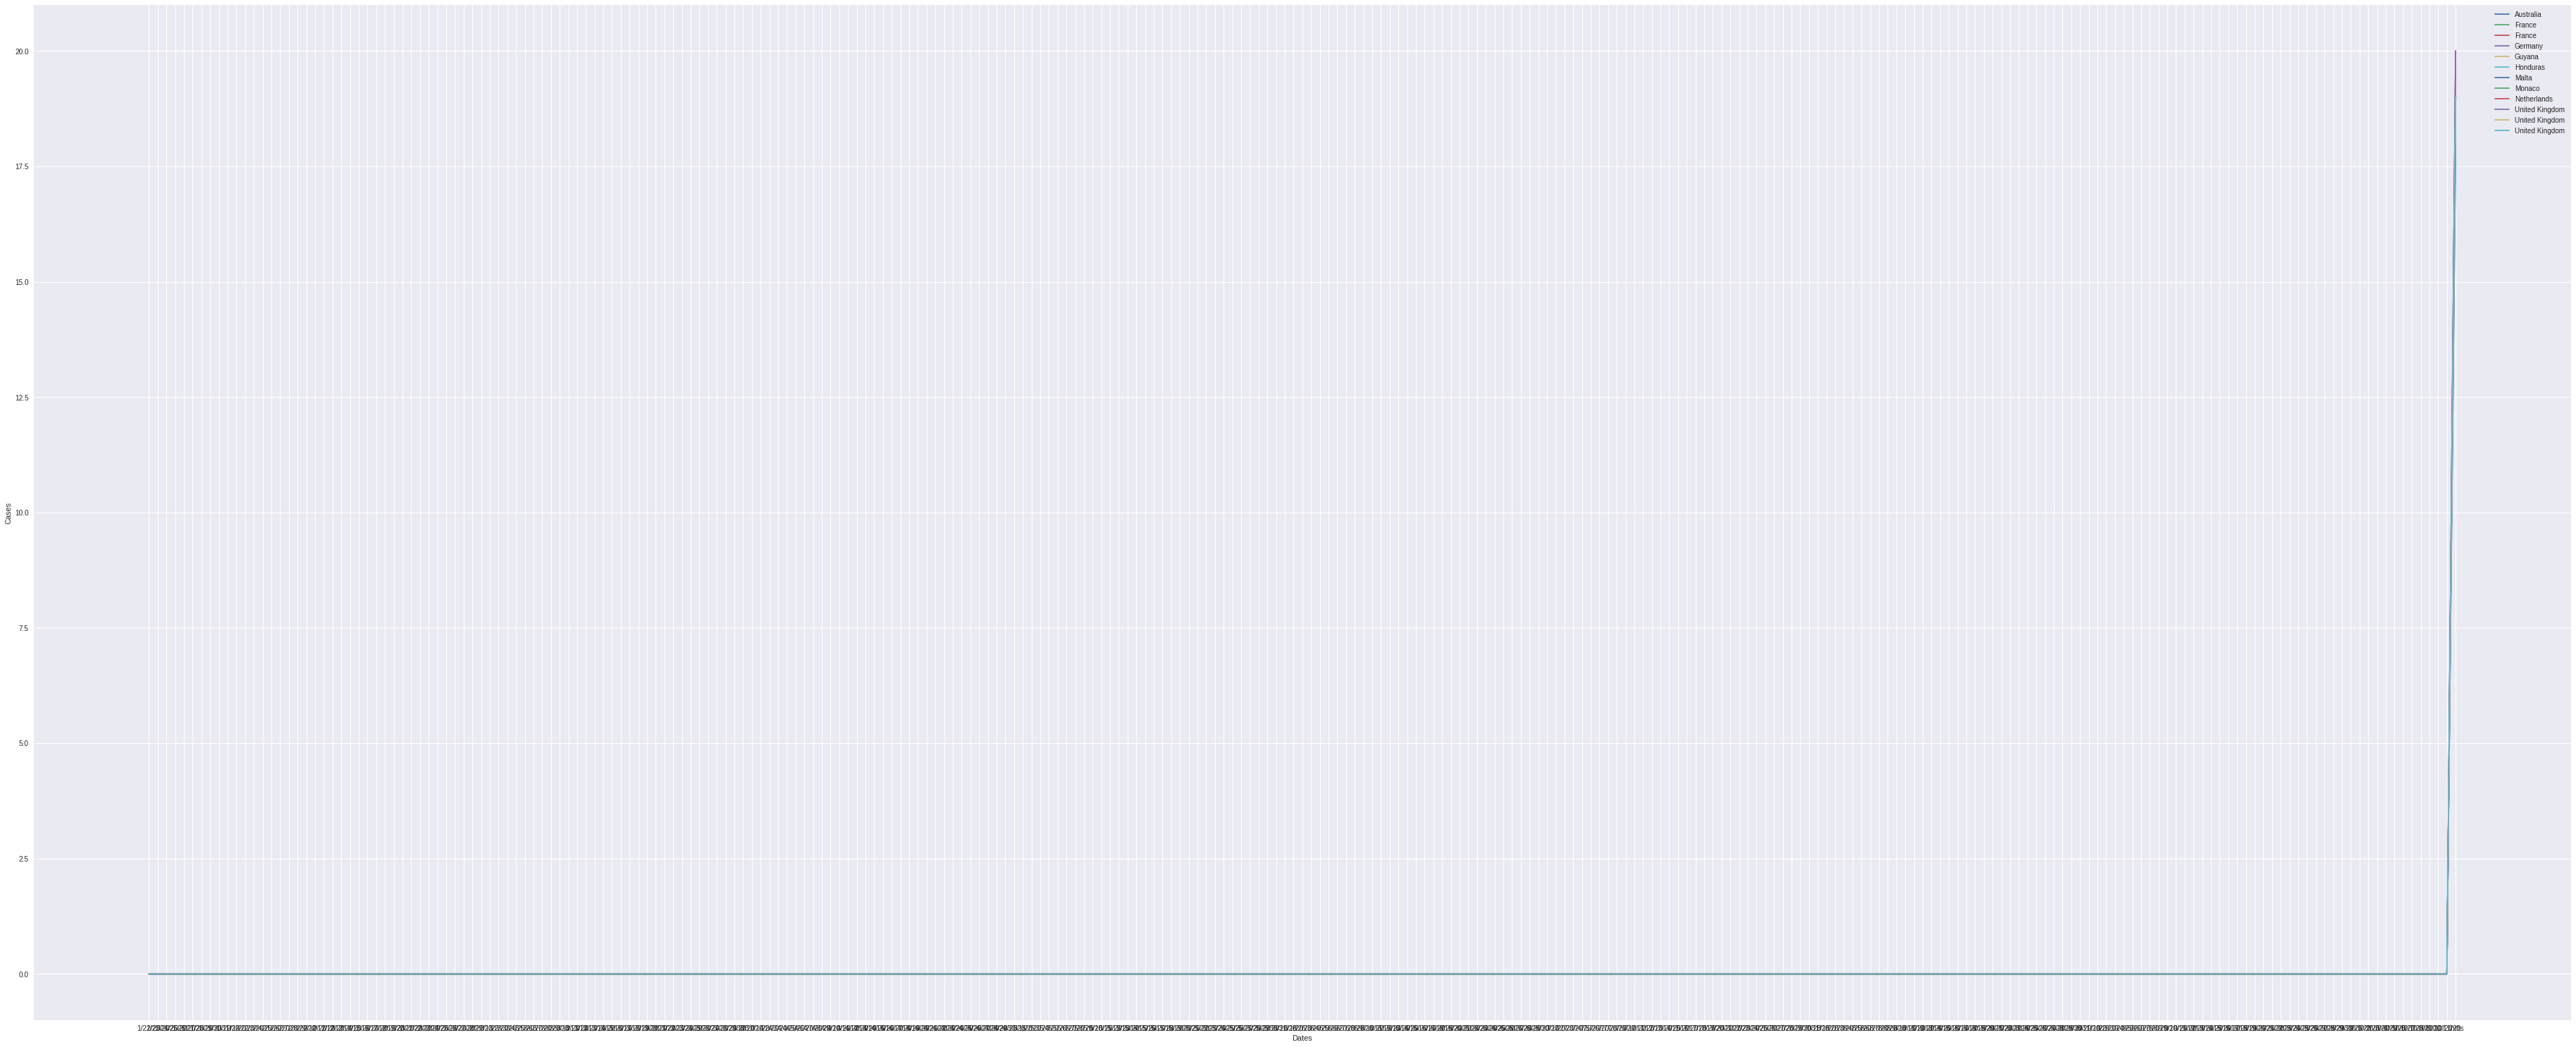

In [28]:
get_graphs(df, cluster_num=4)

In [29]:
cluster1 = df[df['labels']==0]
countries = set(cluster1['Country/Region'])
ss=','.join(countries)
ss

"Mauritius,Congo (Brazzaville),Libya,Vietnam,Ghana,Nigeria,Jamaica,Togo,Japan,Brunei,Turkey,Zambia,Saint Lucia,Estonia,Austria,Maldives,Namibia,Saint Kitts and Nevis,Somalia,Grenada,Yemen,Burundi,Saint Vincent and the Grenadines,Jordan,Taiwan*,Korea, South,Mongolia,West Bank and Gaza,Angola,Ethiopia,Guatemala,Qatar,Chad,Nicaragua,Singapore,Slovakia,Tanzania,Trinidad and Tobago,Uganda,Bhutan,Rwanda,Gambia,Slovenia,Cuba,Uzbekistan,Cambodia,Kenya,Mauritania,China,Ukraine,Cote d'Ivoire,Sri Lanka,Gabon,Poland,Tajikistan,Comoros,Botswana,Cyprus,Sierra Leone,Laos,El Salvador,Algeria,Bulgaria,Senegal,Iceland,Belarus,Russia,Papua New Guinea,Congo (Kinshasa),Seychelles,Saudi Arabia,Burkina Faso,Iraq,Haiti,Lithuania,New Zealand,Kuwait,India,Guinea-Bissau,Thailand,Pakistan,Djibouti,Barbados,Azerbaijan,Fiji,Equatorial Guinea,Australia,Guinea,Denmark,United Arab Emirates,Western Sahara,Zimbabwe,Hungary,Mali,Croatia,France,Mozambique,Egypt,Timor-Leste,Malawi,Dominican Republic,Liberia,Niger,Nepal,Cab

# Recoveries

In [30]:
file_path = os.path.join(BASE_DIR, 'recovered_added_features.csv')
df = pd.read_csv(file_path, index_col=0)
df.head()

Province/State Country/Region       Lat  ...  shift 20  shift 21 shift 22
0    no province    Afghanistan  33.93911  ...        -1        -1       -1
1    no province        Albania  41.15330  ...        -1        -1       -1
2    no province        Algeria  28.03390  ...        -1        -1       -1
3    no province        Andorra  42.50630  ...         2        -1       -1
4    no province         Angola -11.20270  ...        -1        -1       -1

[5 rows x 293 columns]

In [31]:
data = df.iloc[:, 271:]
data.head()

shift 1  shift 2  shift 3  shift 4  ...  shift 19  shift 20  shift 21  shift 22
0        0        0        0        0  ...        -1        -1        -1        -1
1        0        0        0        0  ...        -1        -1        -1        -1
2        0        0        0        0  ...        -1        -1        -1        -1
3        0        0        0        0  ...         5         2        -1        -1
4        0        0        0        0  ...        -1        -1        -1        -1

[5 rows x 22 columns]

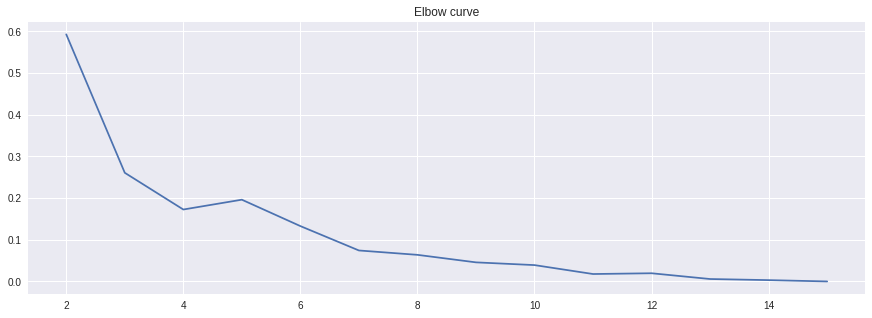

In [32]:
get_elbow(data)

In [33]:
# Number of clusters is based on the elbow method
NUM_CLUSTERS = 4

model_class = TimeSeriesModel(n_clusters=NUM_CLUSTERS, data=data)
model = model_class.build_model()
df['labels'] = model.labels_
df.head()

Province/State Country/Region       Lat  ...  shift 21  shift 22 labels
0    no province    Afghanistan  33.93911  ...        -1        -1      0
1    no province        Albania  41.15330  ...        -1        -1      0
2    no province        Algeria  28.03390  ...        -1        -1      0
3    no province        Andorra  42.50630  ...        -1        -1      3
4    no province         Angola -11.20270  ...        -1        -1      0

[5 rows x 294 columns]

In [34]:
# All countries
def get_graphs(df, cluster_num=0):
  fig=plt.figure(figsize=(50,20))
  ax=fig.add_axes([0,0,1,1])
  ax.set_xlabel("Dates")
  ax.set_ylabel("Cases")

  df_cluster = df[df['labels'] == cluster_num]
  for idx, area in df_cluster.iterrows():
    x = area.index[6:-24]
    y = [area[i] for i in x]
    
    ax.plot(x,y,label=area['Country/Region'])
    #comment out the line below to remove the labels of the area names.
    ax.legend()

In [35]:
get_graphs(df, cluster_num=0)

Output hidden; open in https://colab.research.google.com to view.

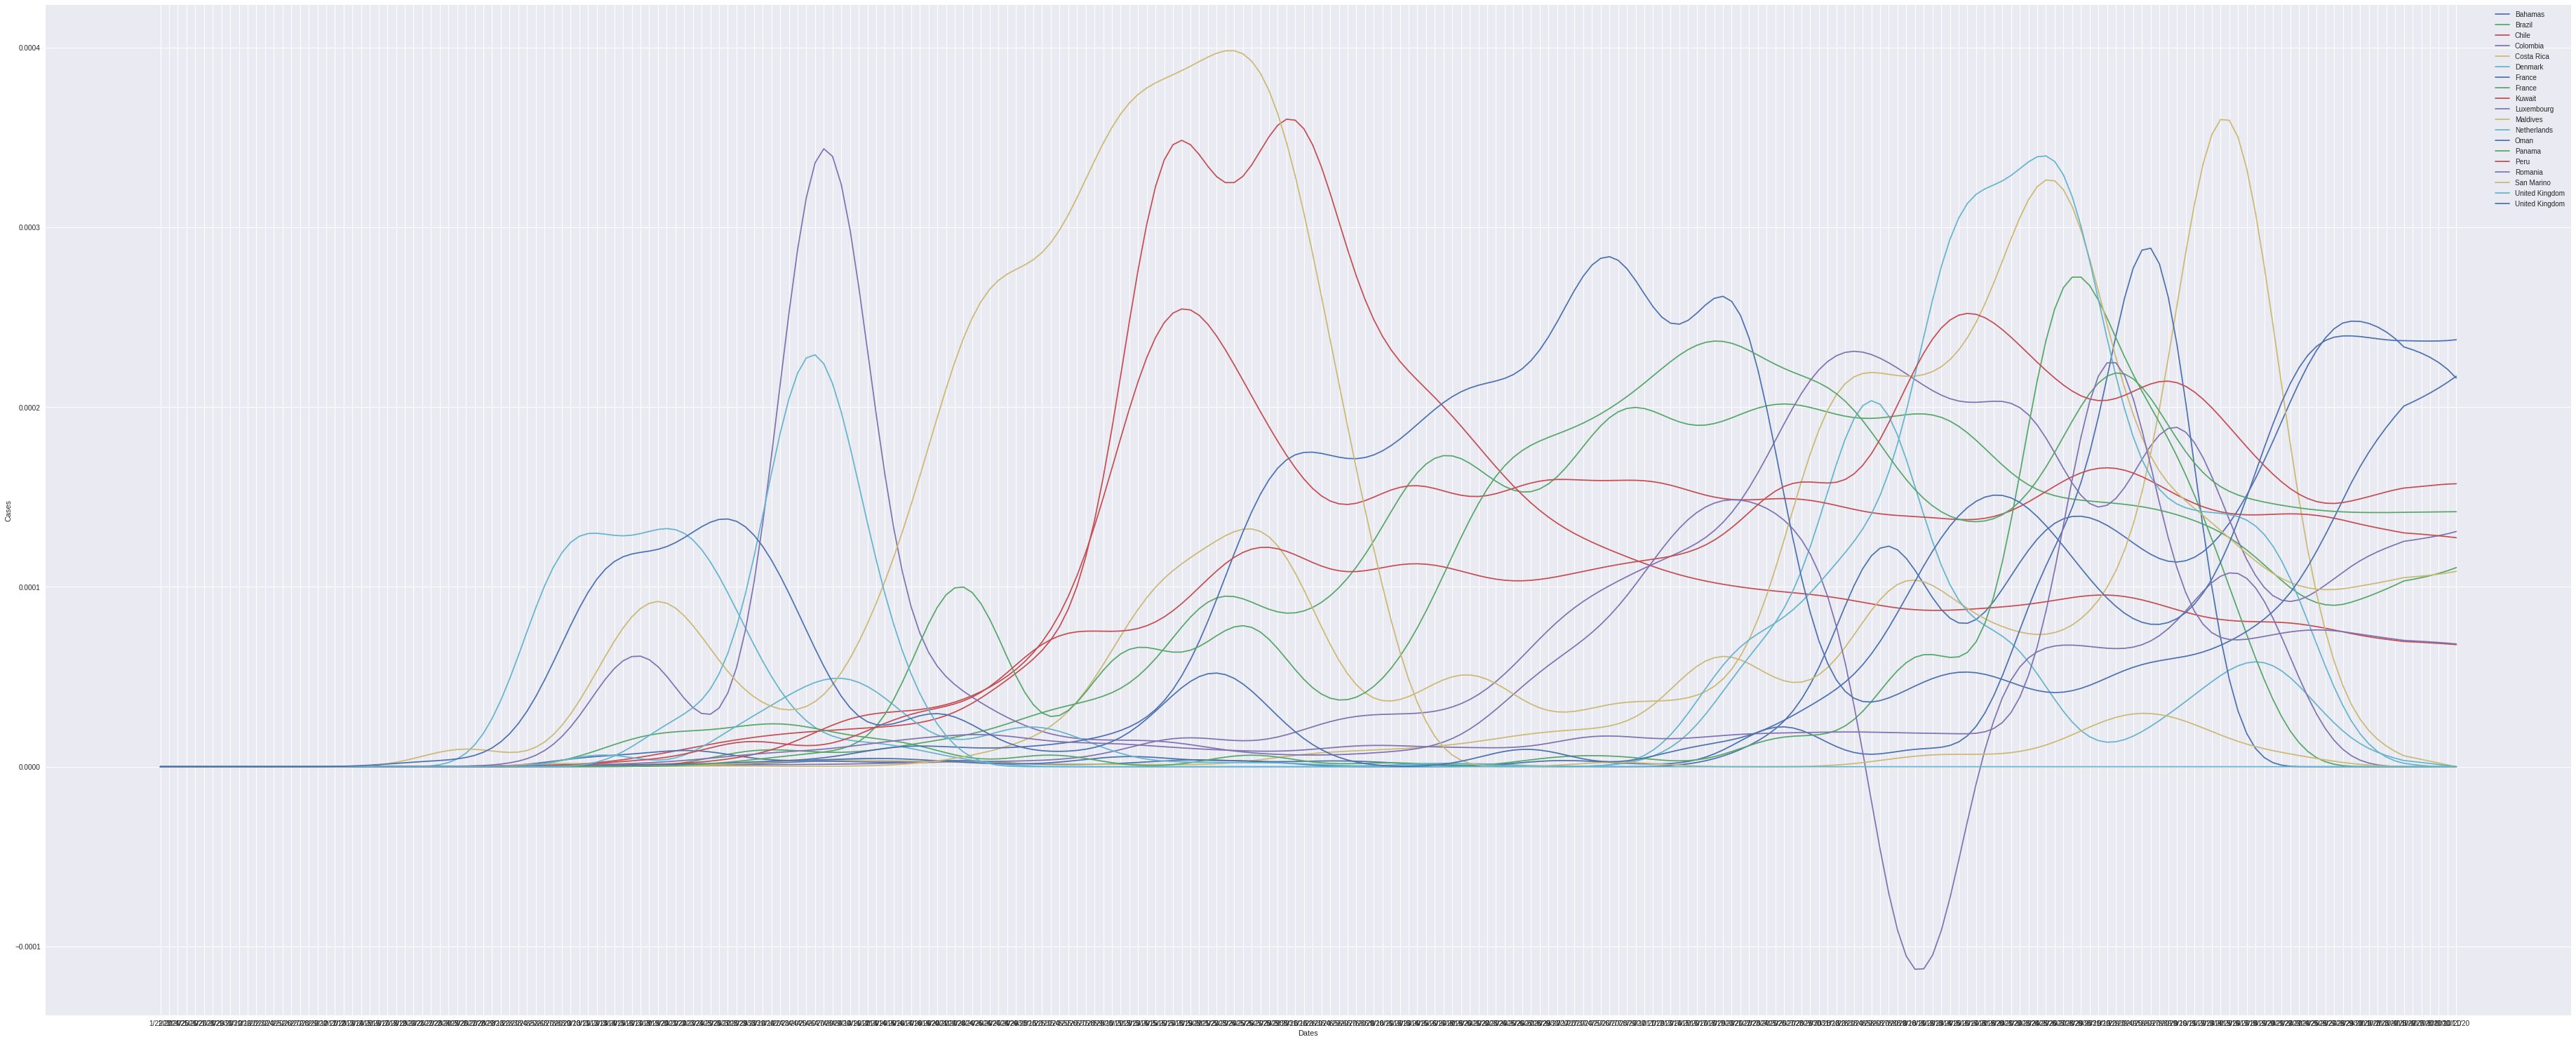

In [36]:
get_graphs(df, cluster_num=1)

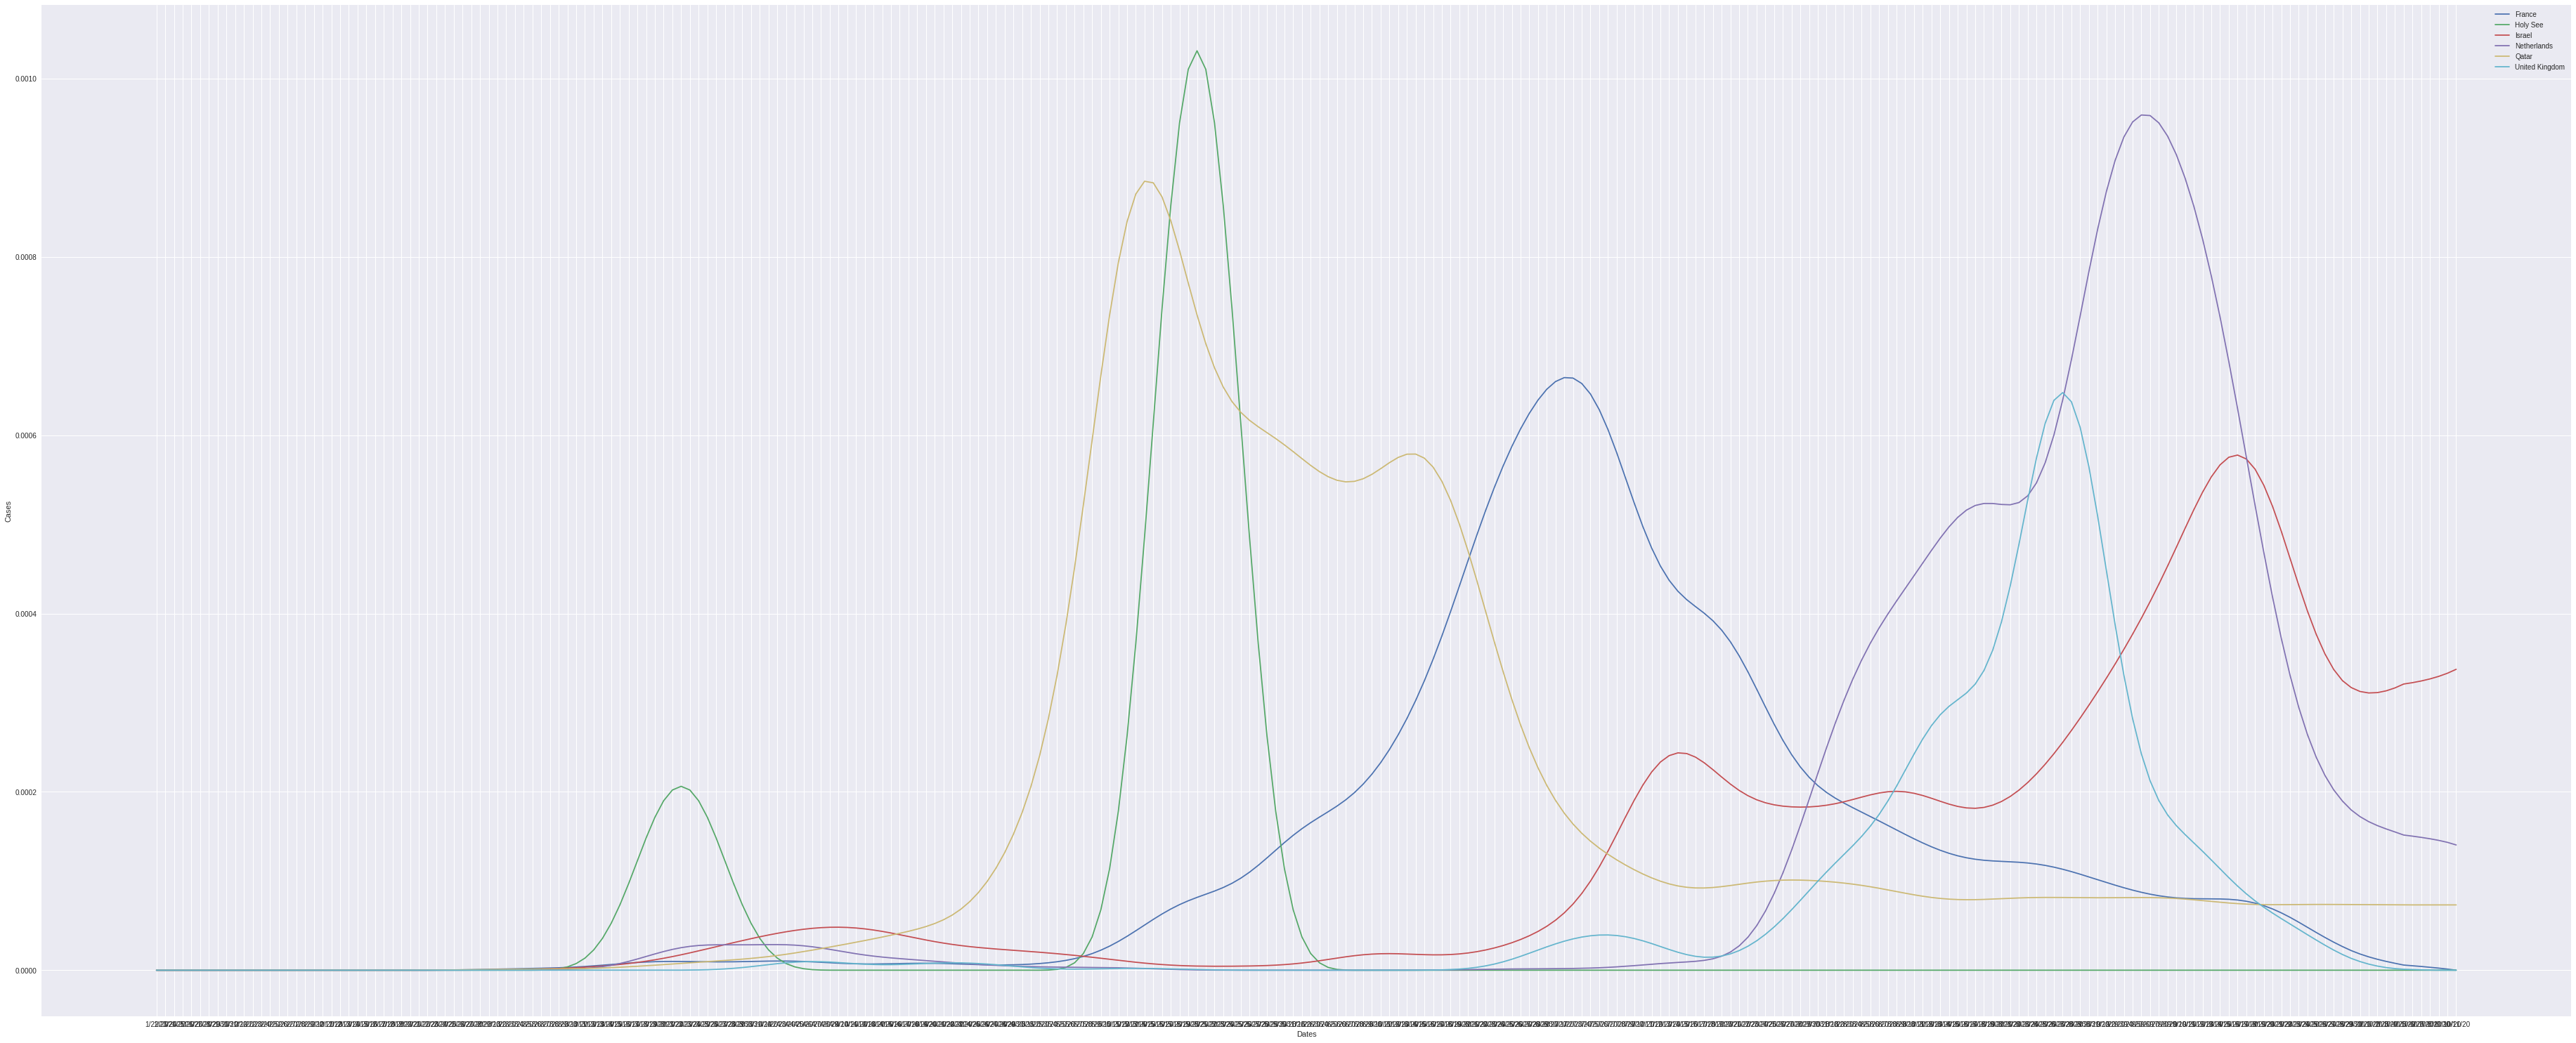

In [37]:
get_graphs(df, cluster_num=2)

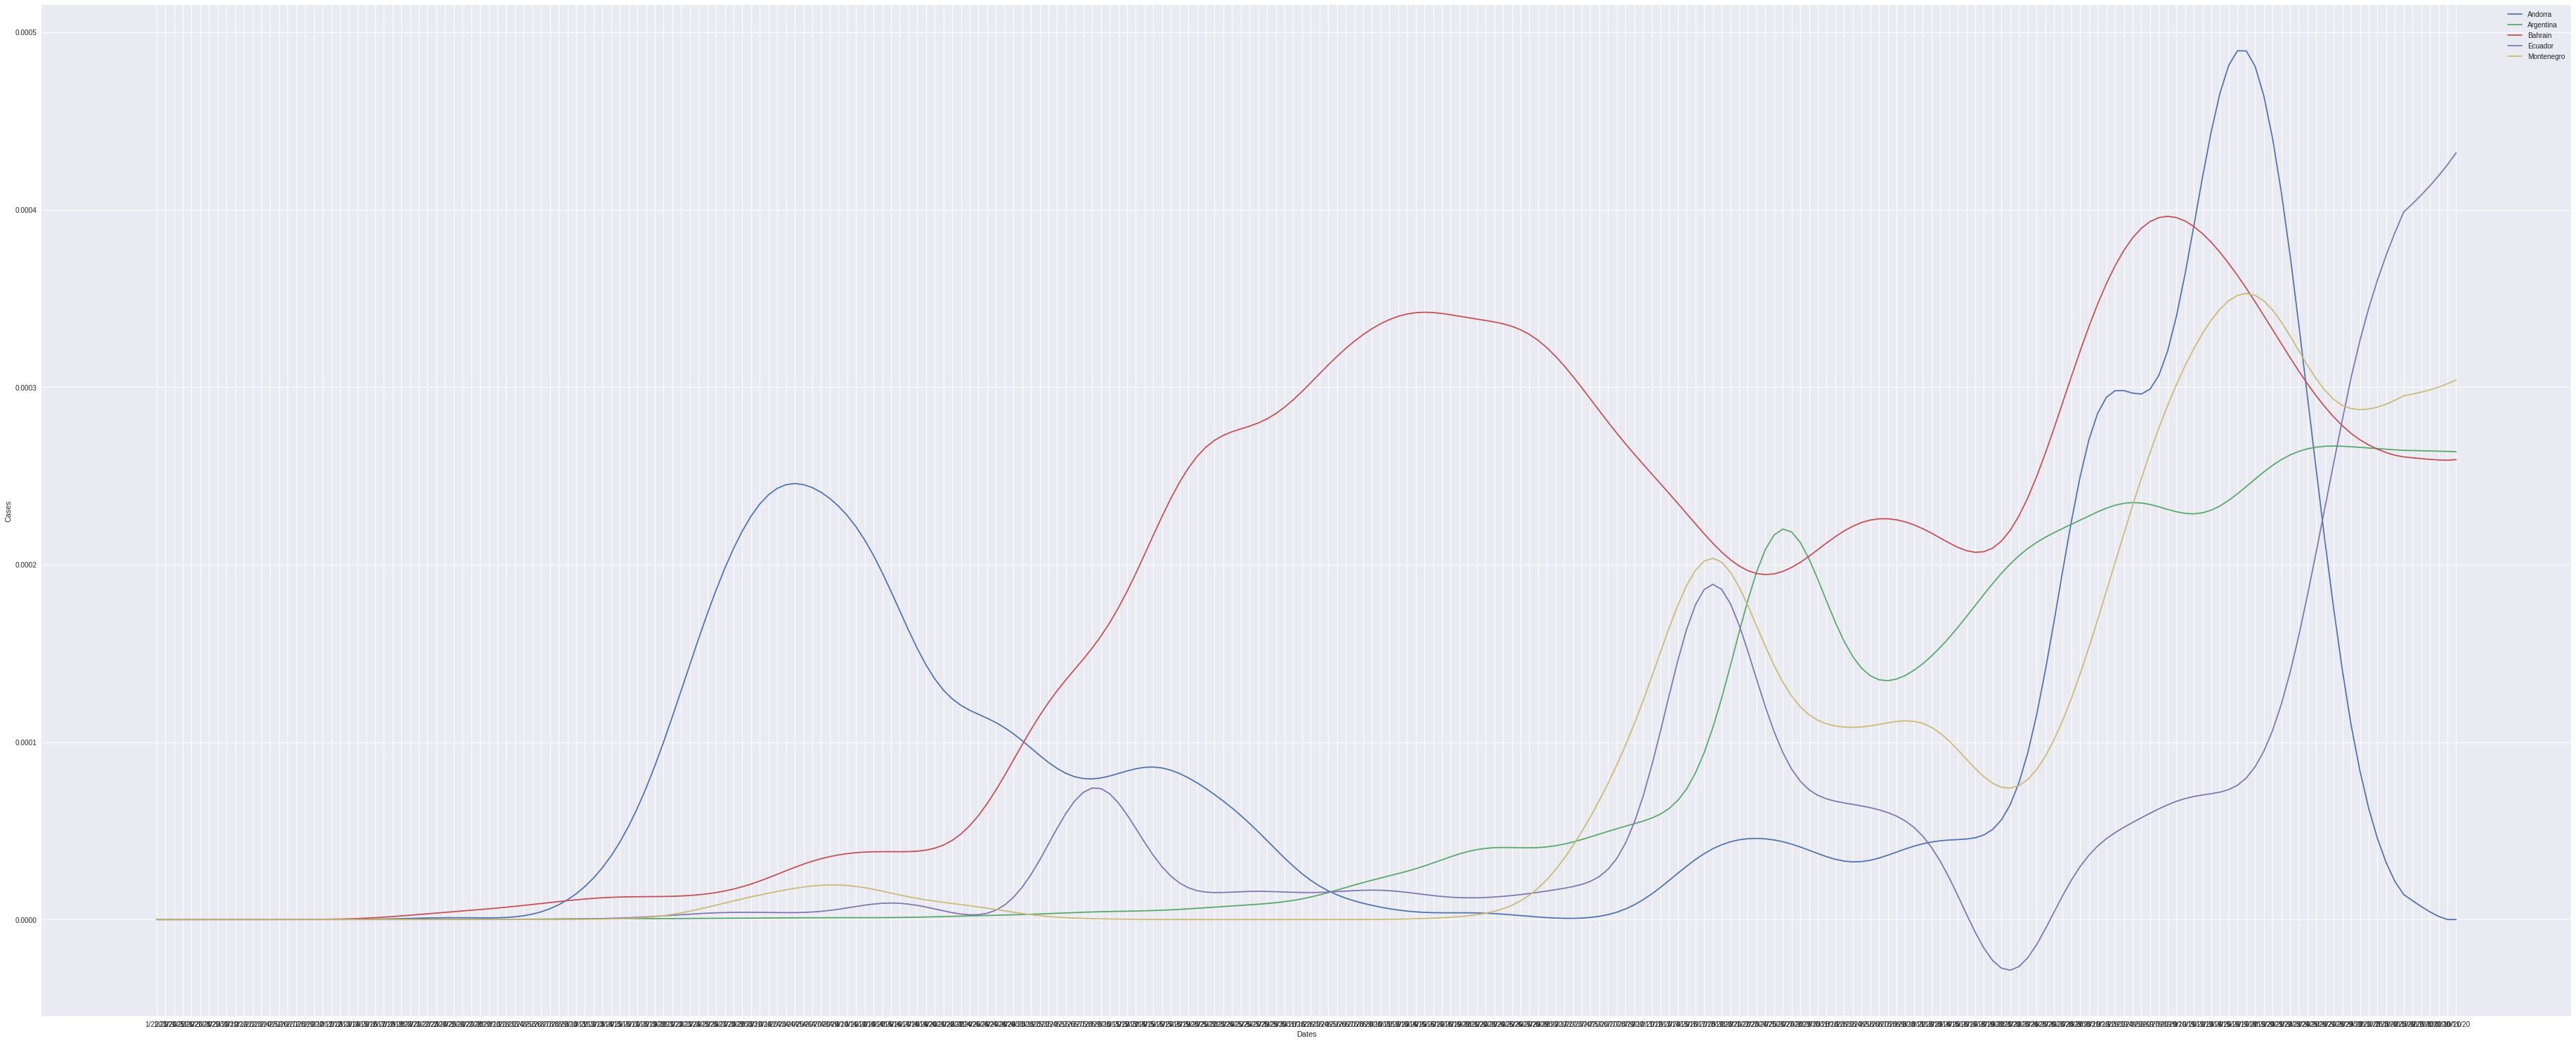

In [38]:
get_graphs(df, cluster_num=3)

In [39]:
confirmed_data = df
confirmed_data.head()

Province/State Country/Region       Lat  ...  shift 21  shift 22 labels
0    no province    Afghanistan  33.93911  ...        -1        -1      0
1    no province        Albania  41.15330  ...        -1        -1      0
2    no province        Algeria  28.03390  ...        -1        -1      0
3    no province        Andorra  42.50630  ...        -1        -1      3
4    no province         Angola -11.20270  ...        -1        -1      0

[5 rows x 294 columns]

In [40]:
deaths_data = df
deaths_data.head()

Province/State Country/Region       Lat  ...  shift 21  shift 22 labels
0    no province    Afghanistan  33.93911  ...        -1        -1      0
1    no province        Albania  41.15330  ...        -1        -1      0
2    no province        Algeria  28.03390  ...        -1        -1      0
3    no province        Andorra  42.50630  ...        -1        -1      3
4    no province         Angola -11.20270  ...        -1        -1      0

[5 rows x 294 columns]

In [41]:
recoveries_data=df
recoveries_data.head()

Province/State Country/Region       Lat  ...  shift 21  shift 22 labels
0    no province    Afghanistan  33.93911  ...        -1        -1      0
1    no province        Albania  41.15330  ...        -1        -1      0
2    no province        Algeria  28.03390  ...        -1        -1      0
3    no province        Andorra  42.50630  ...        -1        -1      3
4    no province         Angola -11.20270  ...        -1        -1      0

[5 rows x 294 columns]

In [42]:
result = pd.merge(confirmed_data, deaths_data, on=['area'])

In [43]:
result=pd.merge(result, recoveries_data, on=['area'])

In [44]:
result.shape

(252, 880)

In [45]:
result.head()

Province/State_x Country/Region_x     Lat_x  ...  shift 21  shift 22 labels
0      no province      Afghanistan  33.93911  ...        -1        -1      0
1      no province          Albania  41.15330  ...        -1        -1      0
2      no province          Algeria  28.03390  ...        -1        -1      0
3      no province          Andorra  42.50630  ...        -1        -1      3
4      no province           Angola -11.20270  ...        -1        -1      0

[5 rows x 880 columns]

In [46]:
data = result.iloc[:, 270:292]
data.head()

shifts_x  shift 1_x  shift 2_x  ...  shift 19_x  shift 20_x  shift 21_x
0        18          0          0  ...          -1          -1          -1
1        18          0          0  ...          -1          -1          -1
2        18          0          0  ...          -1          -1          -1
3        21          0          0  ...           5           2          -1
4        18          0          0  ...          -1          -1          -1

[5 rows x 22 columns]

In [47]:
data2=result.iloc[:, 292+270:292+270+23]
data2.head()

10/11/20_y  shifts_y  shift 1_y  ...  shift 19_y  shift 20_y  shift 21_y
0  1.284411e-06        18          0  ...          -1          -1          -1
1  3.266387e-05        18          0  ...          -1          -1          -1
2  0.000000e+00        18          0  ...          -1          -1          -1
3  0.000000e+00        21          0  ...           5           2          -1
4  8.215109e-07        18          0  ...          -1          -1          -1

[5 rows x 23 columns]

In [48]:
data3=result.iloc[:, 292+292+271:]
data3.head()

10/11/20  shifts  shift 1  shift 2  ...  shift 20  shift 21  shift 22  labels
0  1.284411e-06      18        0        0  ...        -1        -1        -1       0
1  3.266387e-05      18        0        0  ...        -1        -1        -1       0
2  0.000000e+00      18        0        0  ...        -1        -1        -1       0
3  0.000000e+00      21        0        0  ...         2        -1        -1       3
4  8.215109e-07      18        0        0  ...        -1        -1        -1       0

[5 rows x 25 columns]

In [49]:
all_shifts = pd.concat([data, data2, data3], axis=1, join='inner')

In [50]:
all_shifts.shape

(252, 70)

In [51]:
from tslearn.clustering import TimeSeriesKMeans

class TimeSeriesModel:
  n_clusters = 0
  data = []
  model = None

  def __init__(self, n_clusters, data):
    self.n_clusters = n_clusters
    self.data = data
  
  def build_model(self, metric='dtw', max_iter=10):
    model = TimeSeriesKMeans(n_clusters=self.n_clusters, metric=metric, max_iter=max_iter)
    model.fit(self.data)
    self.model = model

    return model

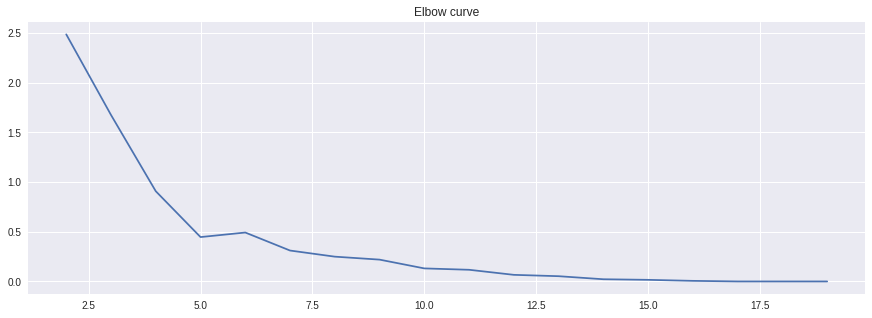

In [52]:
# Elbow method
def get_elbow(data):
  X = data
  distortions = []
  for k in range(2, 20):
    model_class = TimeSeriesModel(n_clusters=k, data=X)
    model = model_class.build_model()
    distortions.append(model.inertia_)

  fig = plt.figure(figsize=(15, 5))
  fig.add_axes()
  plt.plot(range(2, 20), distortions)
  plt.grid(True)
  plt.title('Elbow curve')

get_elbow(all_shifts)

In [53]:
# Number of clusters is based on the elbow method
NUM_CLUSTERS = 5

model_class = TimeSeriesModel(n_clusters=NUM_CLUSTERS, data=all_shifts)
model = model_class.build_model()

In [54]:
all_shifts['labels'] = model.labels_
all_shifts.head()

shifts_x  shift 1_x  shift 2_x  ...  shift 21  shift 22  labels
0        18          0          0  ...        -1        -1       2
1        18          0          0  ...        -1        -1       2
2        18          0          0  ...        -1        -1       2
3        21          0          0  ...        -1        -1       4
4        18          0          0  ...        -1        -1       2

[5 rows x 70 columns]

In [55]:
tmp = result.iloc[:, :269]
tmp.head()

Province/State_x Country/Region_x  ...     10/9/20_x    10/10/20_x
0      no province      Afghanistan  ...  1.250429e-06  1.266750e-06
1      no province          Albania  ...  3.274074e-05  3.270731e-05
2      no province          Algeria  ...  7.036756e-08  3.670095e-08
3      no province          Andorra  ...  1.757619e-06  0.000000e+00
4      no province           Angola  ...  8.259402e-07  8.234125e-07

[5 rows x 269 columns]

In [56]:
tmp2 = result.iloc[:, 297:561]
tmp2.head()

Long_y  population_y  1/22/20_y  ...     10/7/20_y     10/8/20_y     10/9/20_y
0  67.709953      38928346        0.0  ...  1.221395e-06  1.235327e-06  1.250429e-06
1  20.168300       2877797        0.0  ...  3.279216e-05  3.276797e-05  3.274074e-05
2   1.659600      43851044        0.0  ...  1.303469e-07  1.014619e-07  7.036756e-08
3   1.521800         77265        0.0  ...  7.366748e-06  4.334403e-06  1.757619e-06
4  17.873900      32866272        0.0  ...  8.315844e-07  8.287449e-07  8.259402e-07

[5 rows x 264 columns]

In [57]:
tmp3 = result.iloc[:, 590:854]
tmp3.head()

Long  population  1/22/20  ...       10/7/20       10/8/20       10/9/20
0  67.709953    38928346      0.0  ...  1.221395e-06  1.235327e-06  1.250429e-06
1  20.168300     2877797      0.0  ...  3.279216e-05  3.276797e-05  3.274074e-05
2   1.659600    43851044      0.0  ...  1.303469e-07  1.014619e-07  7.036756e-08
3   1.521800       77265      0.0  ...  7.366748e-06  4.334403e-06  1.757619e-06
4  17.873900    32866272      0.0  ...  8.315844e-07  8.287449e-07  8.259402e-07

[5 rows x 264 columns]

In [58]:
graphs = pd.concat([tmp, tmp2, tmp3], axis=1, join='inner')

In [59]:
graphs['labels'] = model.labels_
graphs.head()

Province/State_x Country/Region_x  ...       10/9/20  labels
0      no province      Afghanistan  ...  1.250429e-06       2
1      no province          Albania  ...  3.274074e-05       2
2      no province          Algeria  ...  7.036756e-08       2
3      no province          Andorra  ...  1.757619e-06       4
4      no province           Angola  ...  8.259402e-07       2

[5 rows x 798 columns]

In [60]:
def get_graphs(df, cluster_num=0, last_columns=24):
  fig=plt.figure(figsize=(50,20))
  ax=fig.add_axes([0,0,1,1])
  ax.set_xlabel("Dates")
  ax.set_ylabel("Rates")

  df_cluster = df[df['labels'] == cluster_num]
  for idx, area in df_cluster.iterrows():
    x = area.index[6:-last_columns]
    y = [area[i] for i in x]
    
    ax.plot(x,y,label=area['area'])
    #comment out the line below to remove the labels of the area names.
    ax.legend()

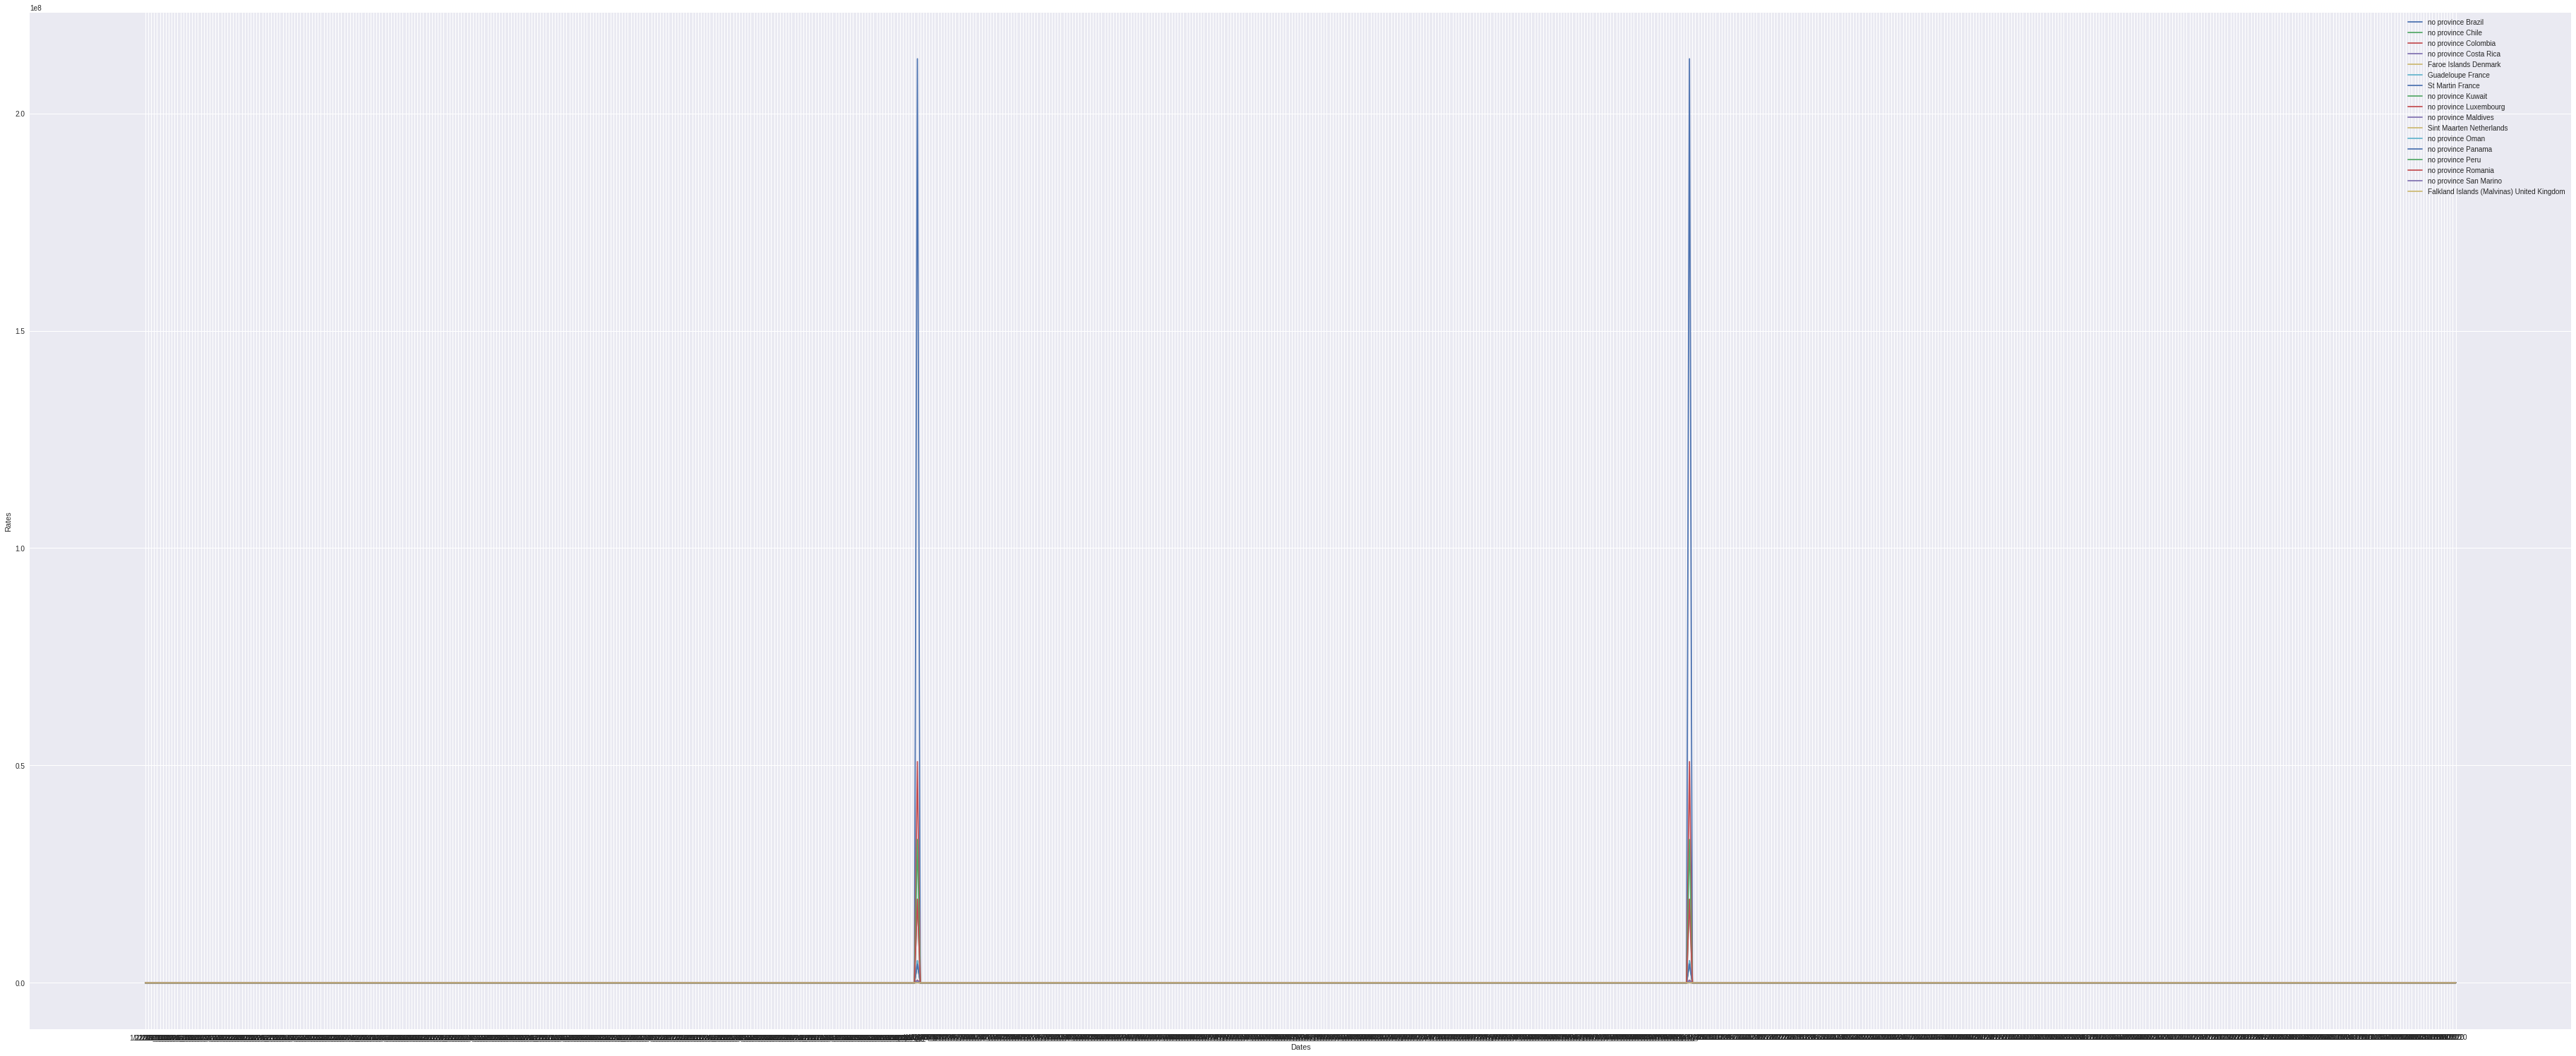

In [61]:
get_graphs(graphs, cluster_num=0, last_columns=1)

In [62]:
cluster1 = graphs[graphs['labels']==0]
countries = set(cluster1['Country/Region_x'])
ss = ','.join(countries)
ss

'United Kingdom,Denmark,Luxembourg,Chile,Netherlands,Peru,Oman,Panama,San Marino,Romania,France,Maldives,Colombia,Brazil,Costa Rica,Kuwait'

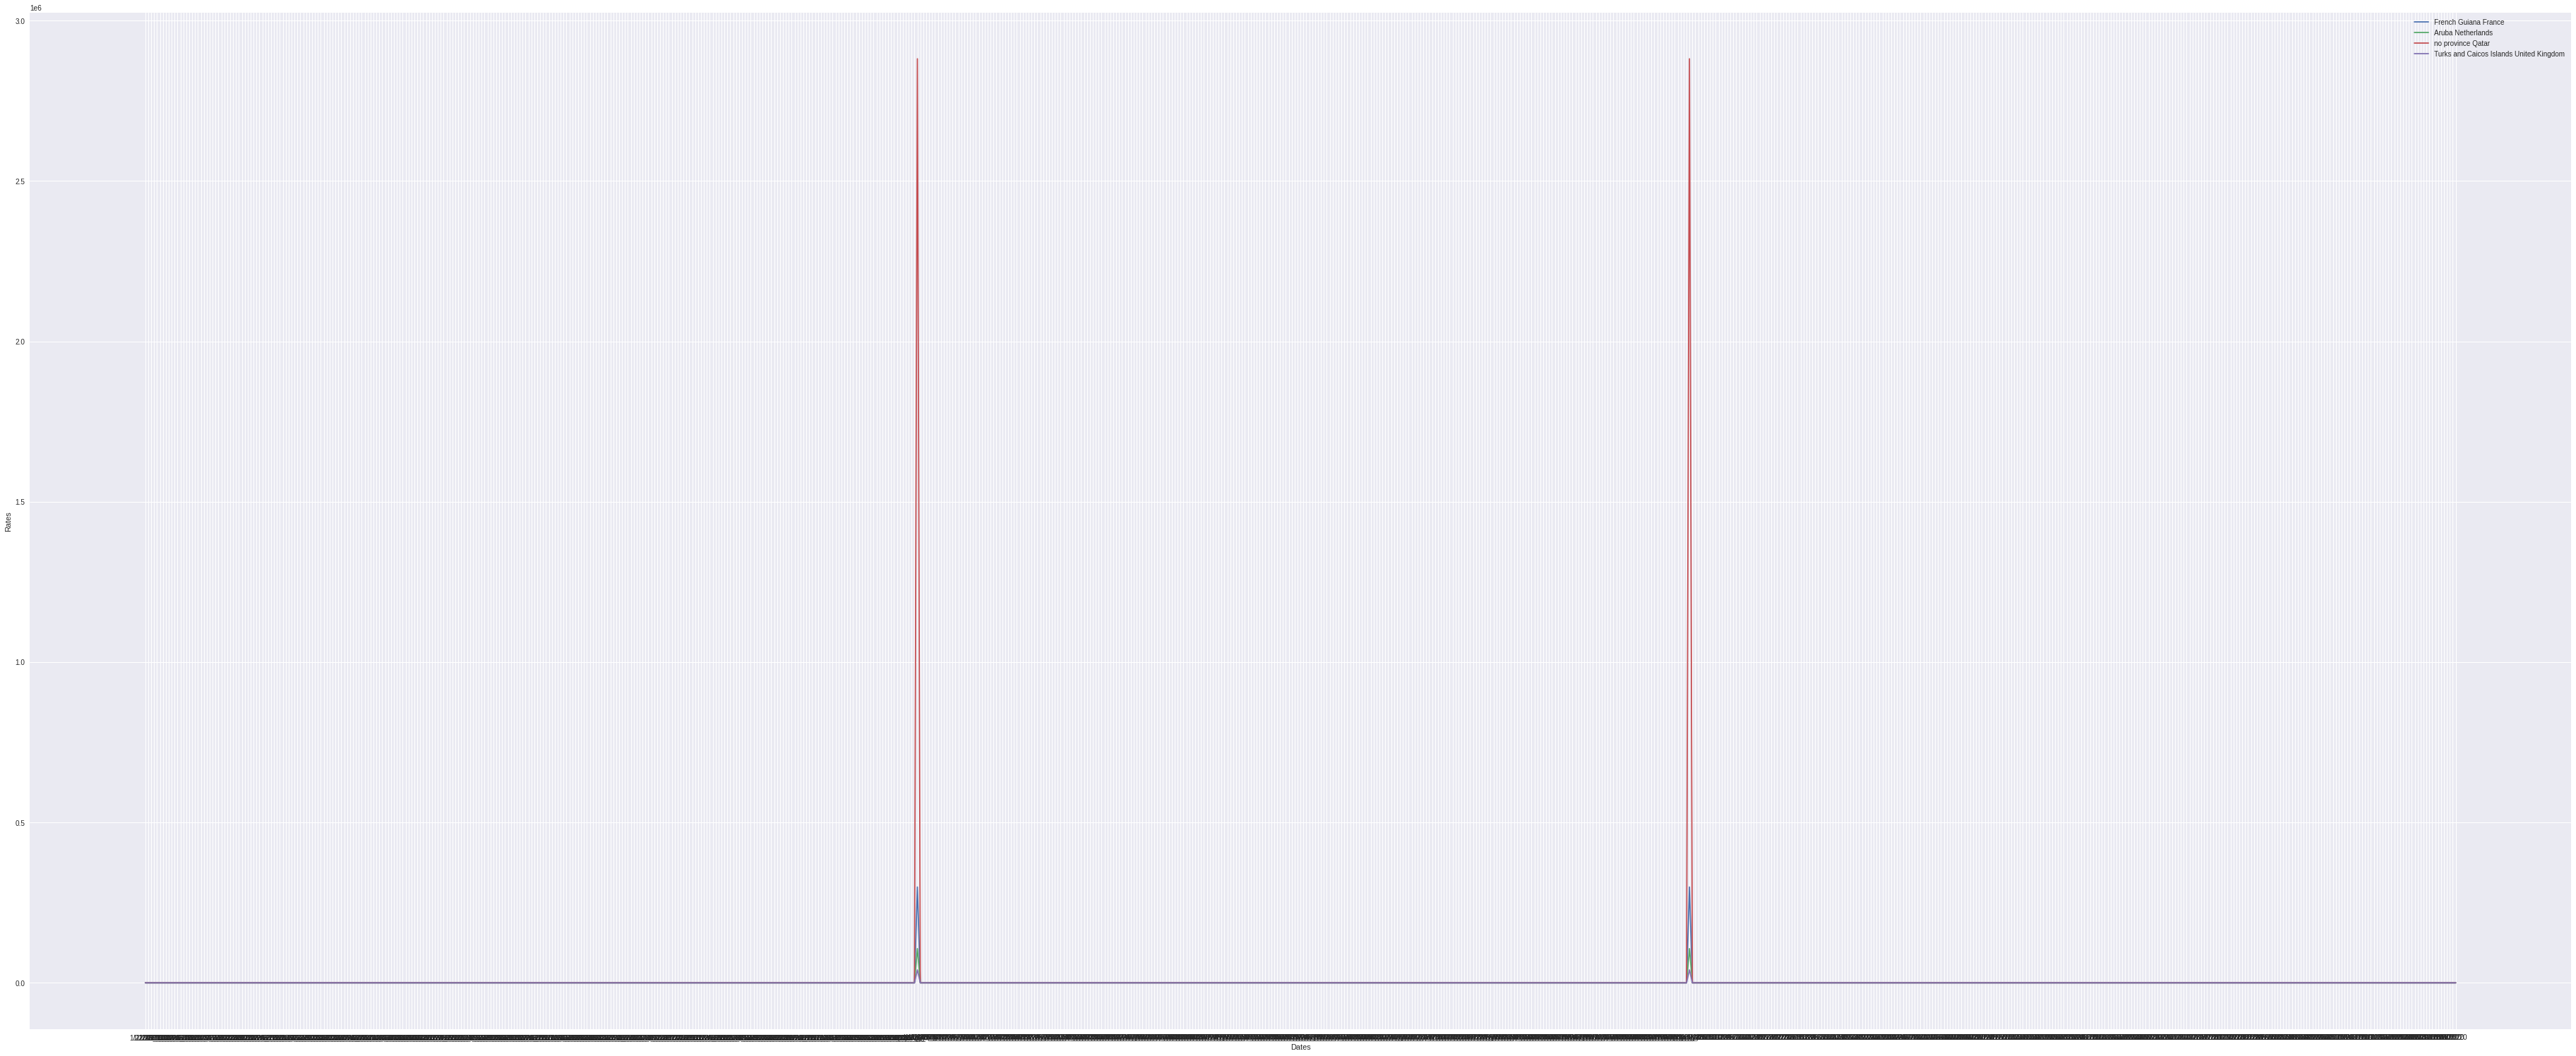

In [63]:
get_graphs(graphs, cluster_num=1, last_columns=1)

In [64]:
cluster1 = graphs[graphs['labels']==1]
countries = set(cluster1['Country/Region_x'])
ss = ','.join(countries)
ss

'Netherlands,Qatar,France,United Kingdom'

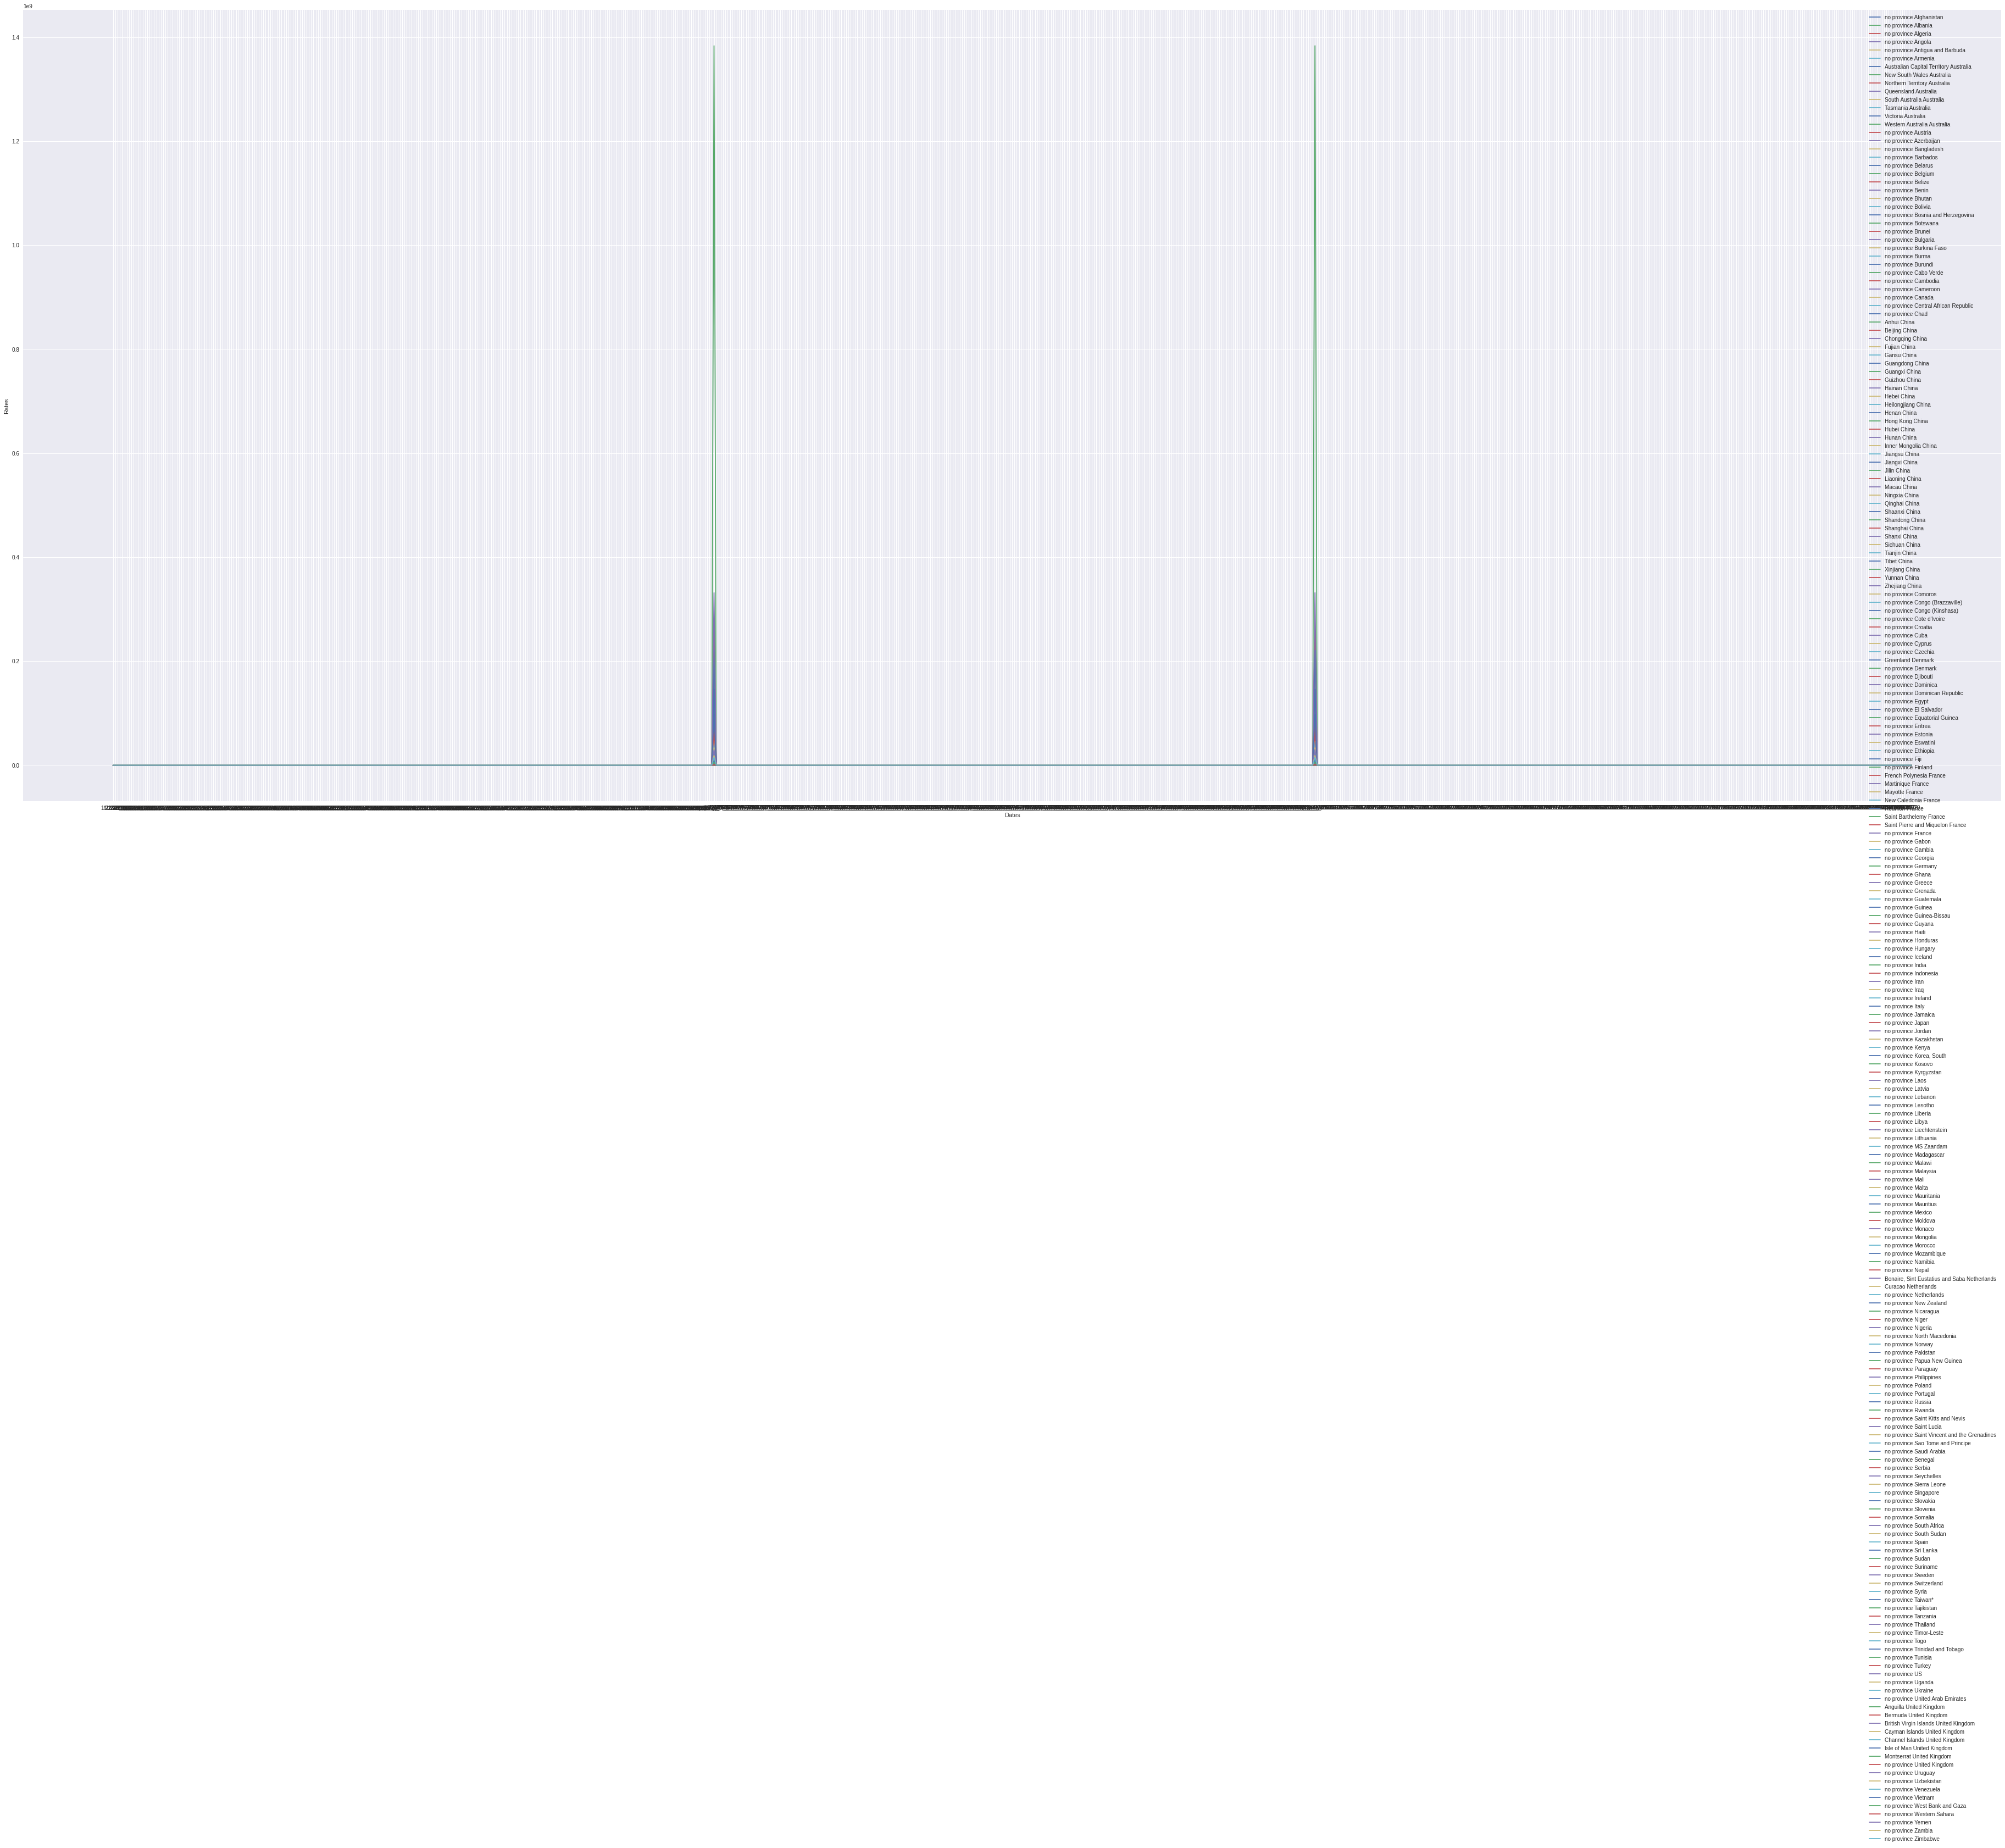

In [65]:
get_graphs(graphs, cluster_num=2, last_columns=1)

In [66]:
cluster1 = graphs[graphs['labels']==2]
countries = set(cluster1['Country/Region_x'])
ss = ','.join(countries)
ss

"Mauritius,Congo (Brazzaville),Libya,Vietnam,Ghana,Nigeria,Jamaica,Togo,Kosovo,Japan,Brunei,Turkey,Zambia,Saint Lucia,Estonia,Austria,Namibia,Czechia,Guyana,Germany,Saint Kitts and Nevis,Somalia,Grenada,Yemen,Burundi,Mexico,Armenia,Saint Vincent and the Grenadines,Jordan,Taiwan*,Suriname,Korea, South,Mongolia,West Bank and Gaza,US,Angola,Ethiopia,Guatemala,Chad,Nicaragua,Singapore,Paraguay,Slovakia,South Africa,Tanzania,Trinidad and Tobago,Belize,Uganda,Bhutan,Rwanda,Gambia,Iran,Slovenia,Cuba,Uzbekistan,Cambodia,Kenya,Mauritania,China,Ukraine,Cote d'Ivoire,Sri Lanka,Gabon,Poland,Tajikistan,Comoros,Ireland,Botswana,Cyprus,Sierra Leone,Laos,El Salvador,Algeria,Bulgaria,Senegal,Iceland,Belarus,Moldova,Russia,Papua New Guinea,Congo (Kinshasa),Seychelles,Saudi Arabia,Burkina Faso,Iraq,Haiti,Lithuania,New Zealand,India,Guinea-Bissau,Thailand,Pakistan,Djibouti,Barbados,Portugal,Azerbaijan,Fiji,Kyrgyzstan,Sweden,Equatorial Guinea,Australia,Honduras,Guinea,Denmark,United Arab Emirates,Western S

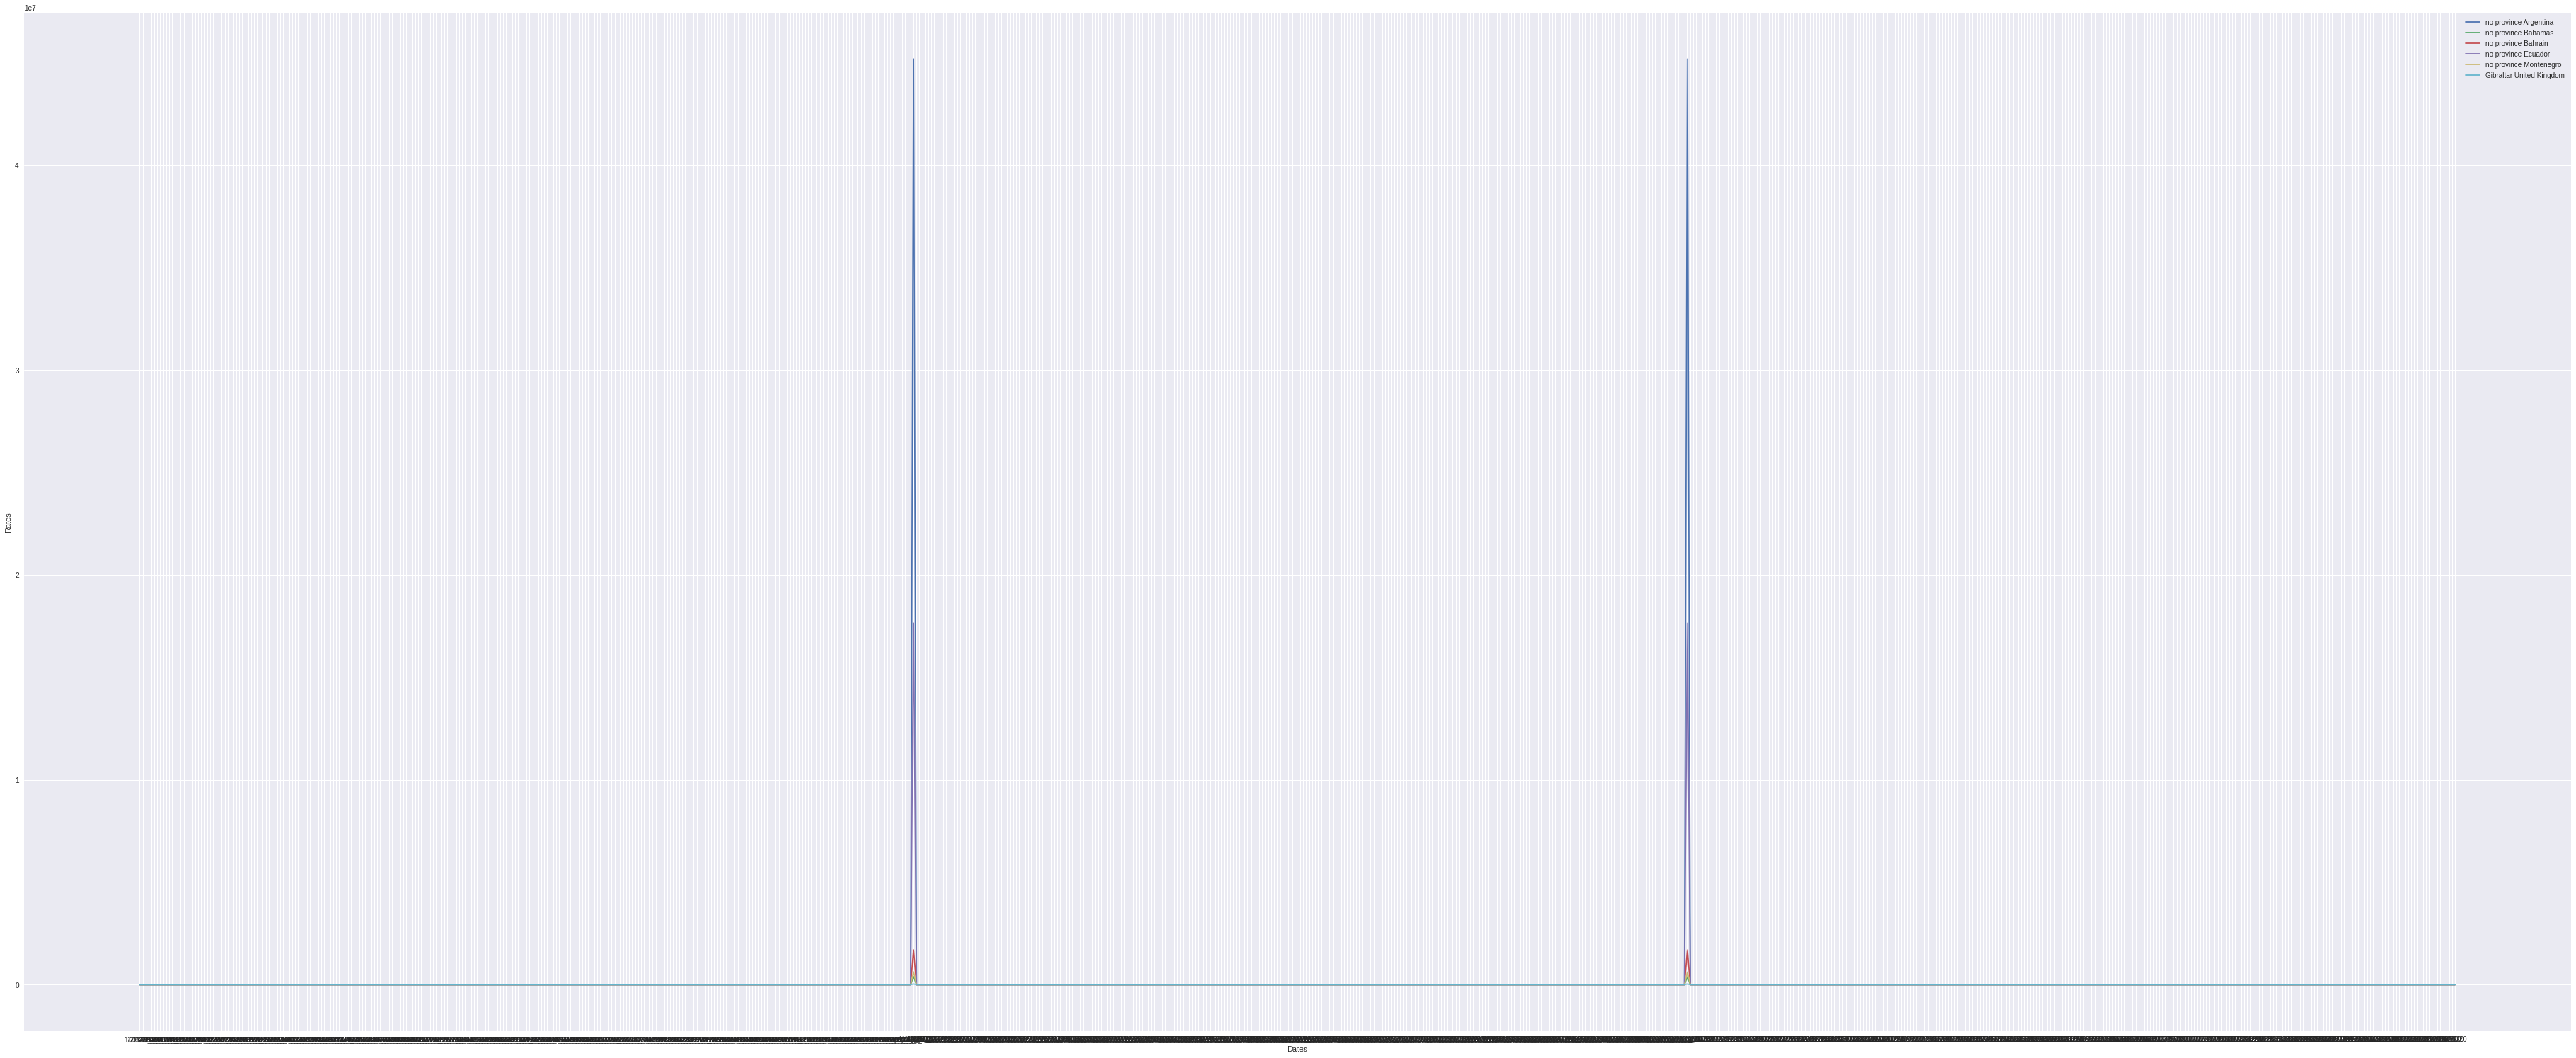

In [67]:
get_graphs(graphs, cluster_num=3, last_columns=1)

In [68]:
cluster1 = graphs[graphs['labels']==3]
countries = set(cluster1['Country/Region_x'])
ss = ','.join(countries)
ss

'Bahamas,Argentina,Montenegro,Ecuador,United Kingdom,Bahrain'

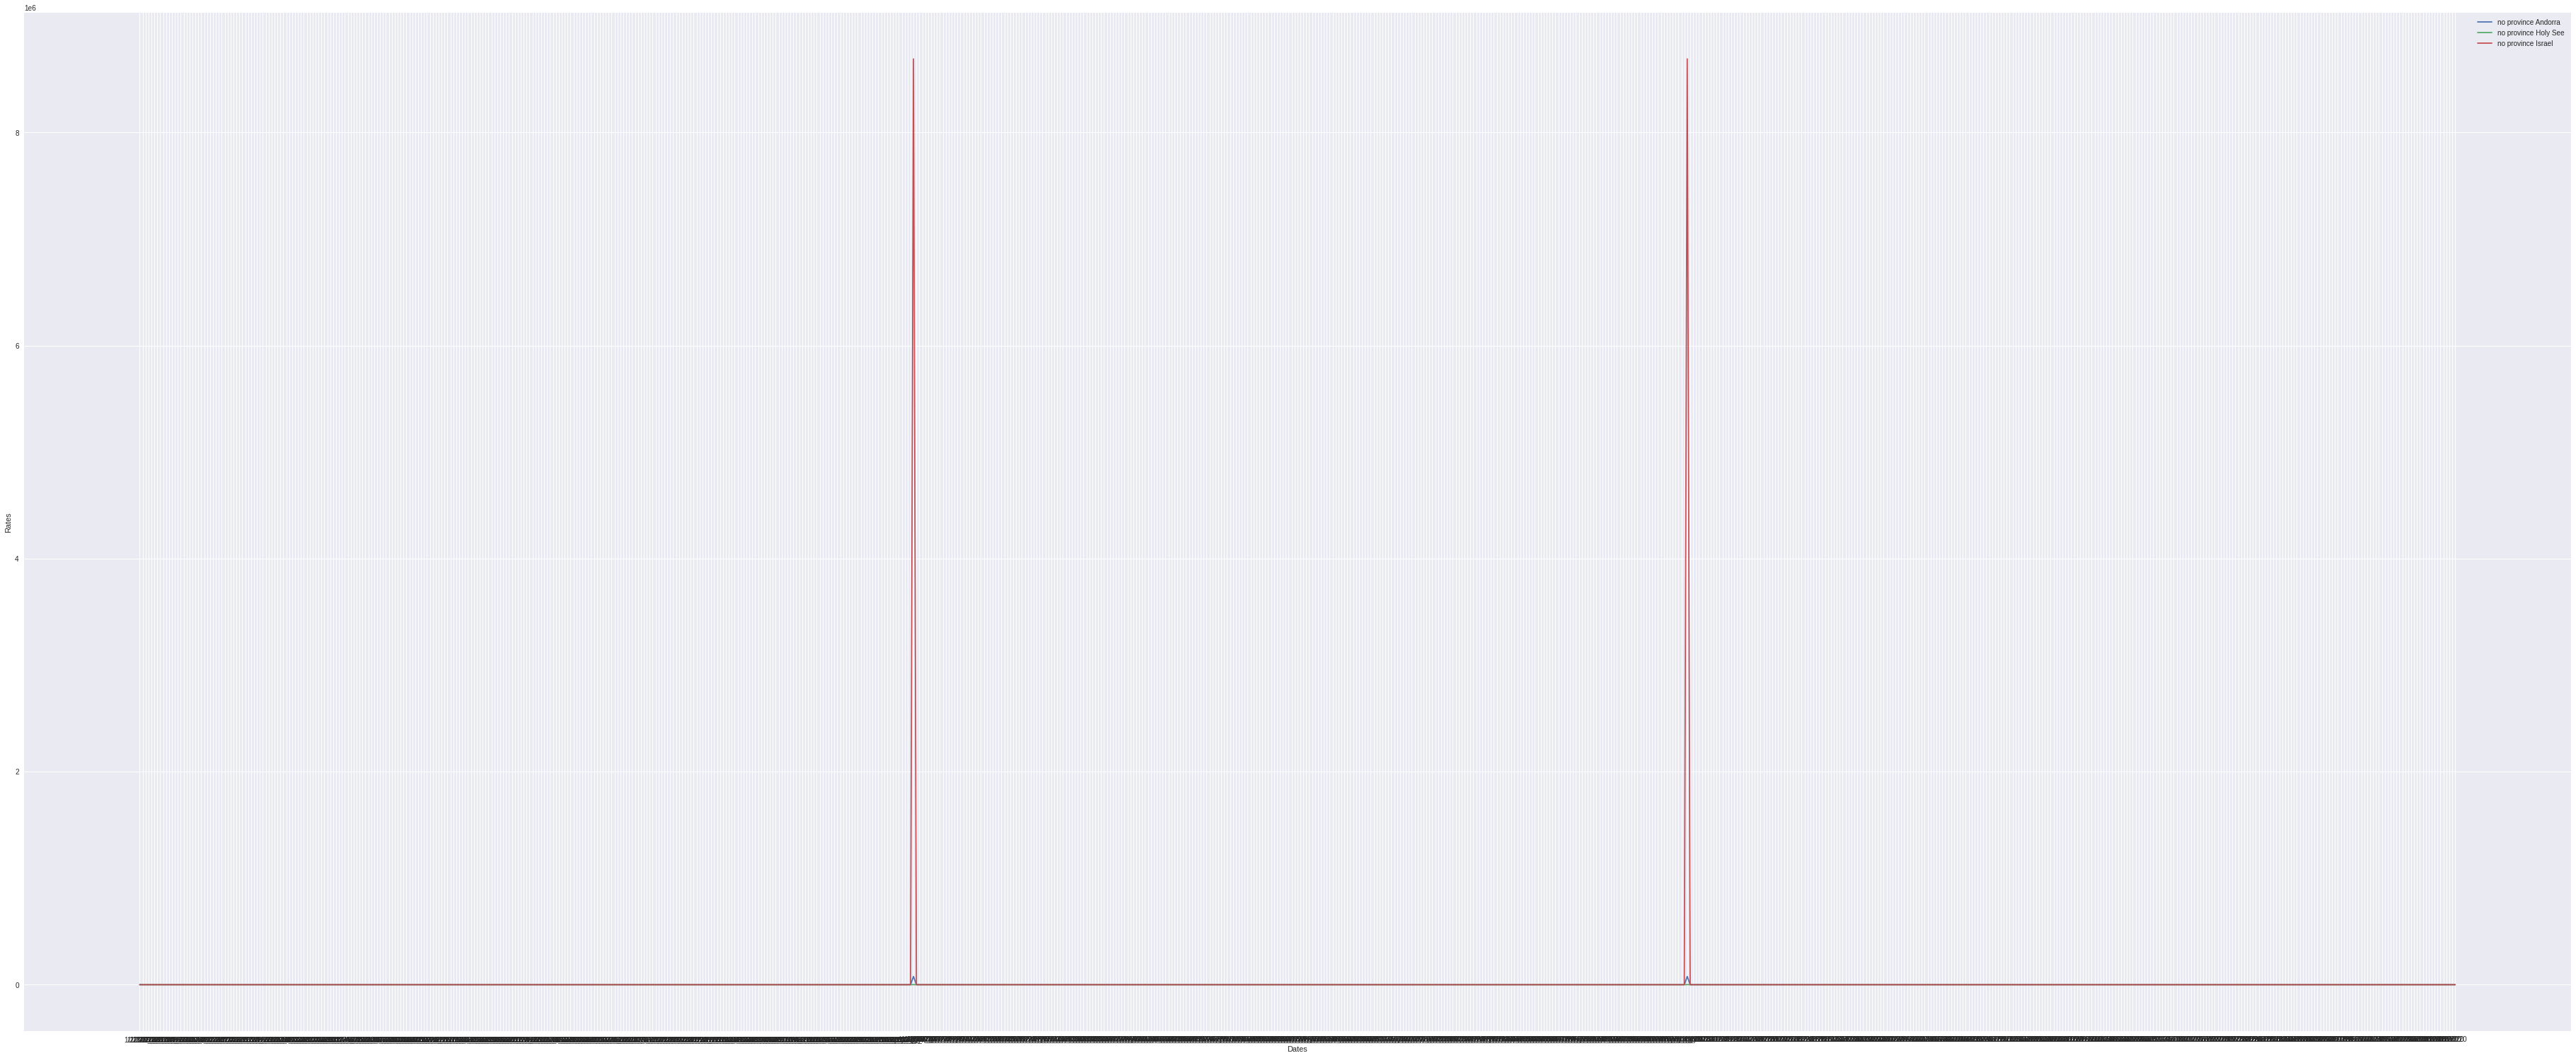

In [69]:
get_graphs(graphs, cluster_num=4, last_columns=1)

In [70]:
cluster1 = graphs[graphs['labels']==4]
countries = set(cluster1['Country/Region_x'])
ss = ','.join(countries)
ss

'Holy See,Israel,Andorra'

In [73]:
graphs.to_csv(os.path.join(BASE_DIR, 'clustered_countries.csv'))